In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_excel("Orders_December_2020.xlsx")
df

OrderedAt Date        Order No.        Customer Name  \
0    2020-12-01 17:37:52  STU-2143266178    Rodam Enterprises   
1    2020-12-01 17:37:52  STU-2143266178    Rodam Enterprises   
2    2020-12-01 17:37:52  STU-2143266178    Rodam Enterprises   
3    2020-12-01 16:20:59  STU-2143266042  O And K Super Store   
4    2020-12-01 16:20:59  STU-2143266042  O And K Super Store   
...                  ...             ...                  ...   
2041 2020-12-17 11:31:11  STU-2143281499     Emybest Minimart   
2042 2020-12-17 11:31:11  STU-2143281499     Emybest Minimart   
2043 2020-12-22 14:30:38  STU-2143285392   Ezzybest Minimarts   
2044 2020-12-22 14:30:38  STU-2143285392   Ezzybest Minimarts   
2045 2020-12-22 14:30:38  STU-2143285392   Ezzybest Minimarts   

                           Producer                                Product  \
0       Hayat Kimya Nigeria Limited                            Molfix Twin   
1       Hayat Kimya Nigeria Limited                            Molfix Twin   
2       Hayat Kimya Nigeria Limited                            Molfix Twin   
3       Hayat Kimya Nigeria Limited                            Molfix Twin   
4       Hayat Kimya Nigeria Limited                            Molfix Twin   
...                             ...                                    ...   
2041           Henkel Expand Global                          WAW Detergent   
2042           Henkel Expand Global  Nittol Antibacterial Powder Detergent   
2043         PZ Cussons Nigeria Plc                         Canoe Bar Soap   
2044                Eko Supreme Ltd           Good Mama Cleaning Detergent   
2045  Extreme Manufacturing Nig Ltd                      So Easy Detergent   

     Category Group         Category  \
0              Baby      Infant Care   
1              Baby      Infant Care   
2              Baby      Infant Care   
3              Baby      Infant Care   
4              Baby      Infant Care   
...             ...              ...   
2041      Home Care  Household Clean   
2042      Home Care  Household Clean   
2043      Home Care     Fabric Clean   
2044      Home Care  Household Clean   
2045      Home Care     Fabric Clean   

                                              Variant  Quantity  Unit Price  \
0                   Molfix Twin Midi(4-9 Kg) x 36 x 4       2.0        7000   
1           Molfix Twin Mini(3-6 kg) by 40, pack of 4       1.0        7000   
2          Molfix Twin Maxi(7-18 kg) by 32, pack of 4       1.0        7000   
3                   Molfix Twin Midi(4-9 Kg) x 36 x 4       1.0        7000   
4          Molfix Twin Maxi(7-18 kg) by 32, pack of 4       1.0        7000   
...                                               ...       ...         ...   
2041      WAW Multi Purpose Powder Detergent 90g x 48       1.0        2200   
2042  Nittol Antibacterial Powder Detergent 180g x 26       1.0        2450   
2043               Canoe 130g x 48 Extra care (White)       1.0        3550   
2044    Good Mama Cleaning Detergent 170g x 26 Floral       1.0        2250   
2045                                So Easy 170g x 26       1.0        2300   

     shippingStatus    Delivery Agent       Delivery Date  Customer Type  \
0         delivered     Maryjane Joel 2020-12-02 12:01:26  General Trade   
1         delivered     Maryjane Joel 2020-12-02 12:01:26  General Trade   
2         delivered     Maryjane Joel 2020-12-02 12:01:26  General Trade   
3         delivered  Ralia Okwuchukwu 2020-12-02 12:08:02  General Trade   
4         delivered  Ralia Okwuchukwu 2020-12-02 12:08:02  General Trade   
...             ...               ...                 ...            ...   
2041      cancelled               NaN                 NaT  General Trade   
2042      cancelled               NaN                 NaT  General Trade   
2043      cancelled               NaN                 NaT  General Trade   
2044      cancelled               NaN                 NaT  General Trade   
2045      cancelled      

# 1) Show the following topline numbers 																		
																		
- a)	Number of Unique Customers																	
- b)	Number of Unique Orders																	
- c)	Total Order Value																	
- d)	Average Order Value																	
- e)	Fulfilment Rate (Order Count)																	
- f)	Average Fulfilment Time (In hours)																	
- g)	Loss Sale																	
- h)	Unique Number of SKUs																	
- i)	Average Unique SKUs per Customer																	

In [3]:
unique_customers = df['Customer Name'].nunique()
unique_customers

243

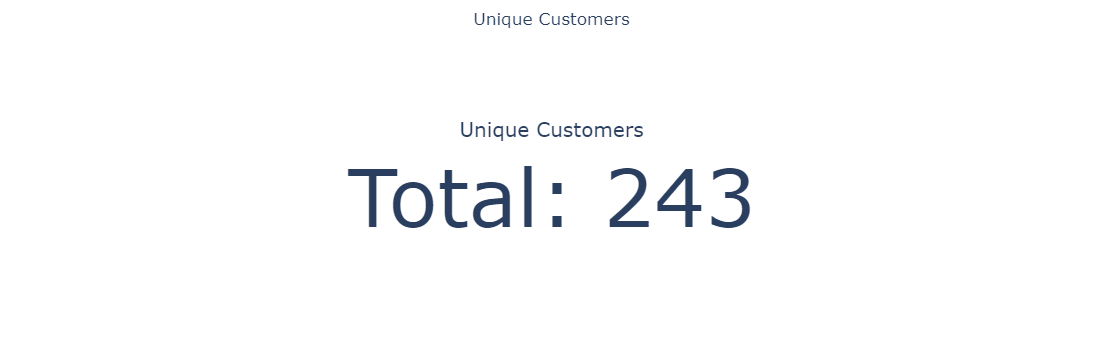

In [4]:
# Calculate the number of unique customers
unique_customers = df['Customer Name'].nunique()

# Create a card visual
fig = go.Figure(go.Indicator(
    mode="number",
    value=unique_customers,
    title={"text": "Unique Customers"},
    number={'prefix': 'Total: '},
))

# Update layout
fig.update_layout(
    title="Unique Customers",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=150,
    width=200,  # Adjust the width here
)

# Show the figure
fig.show()


In [5]:
unique_orders = df['Order No.'].nunique()
unique_orders

621

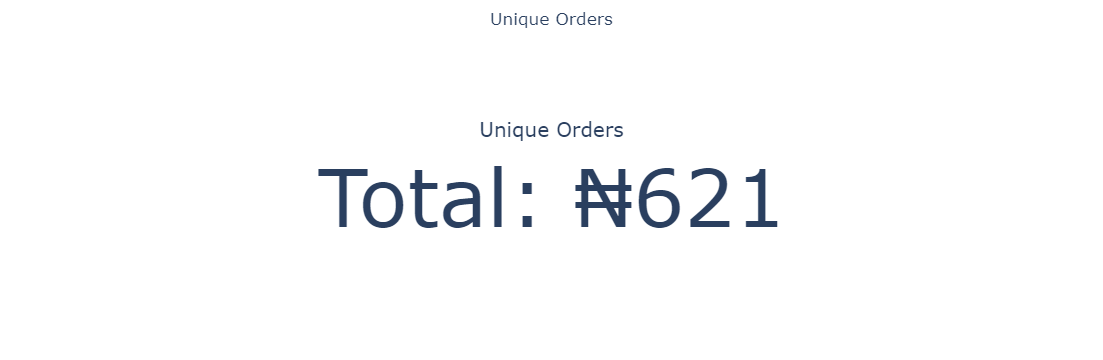

In [6]:
import plotly.graph_objects as go

# Calculate the number of unique orders
unique_orders = df['Order No.'].nunique()

# Create a card visual
fig = go.Figure(go.Indicator(
    mode="number",
    value=unique_orders,
    title={"text": "Unique Orders"},
    number={'prefix': 'Total: \u20A6'},  # Use '\u20A6' for Naira sign
))

# Update layout
fig.update_layout(
    title="Unique Orders",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=150,
    width=200,  # Adjust the width here
)

# Show the figure
fig.show()


In [7]:
total_order_value = df['Quantity'] * df['Unit Price']
total_order_value = total_order_value.sum()
total_order_value

32655577.0

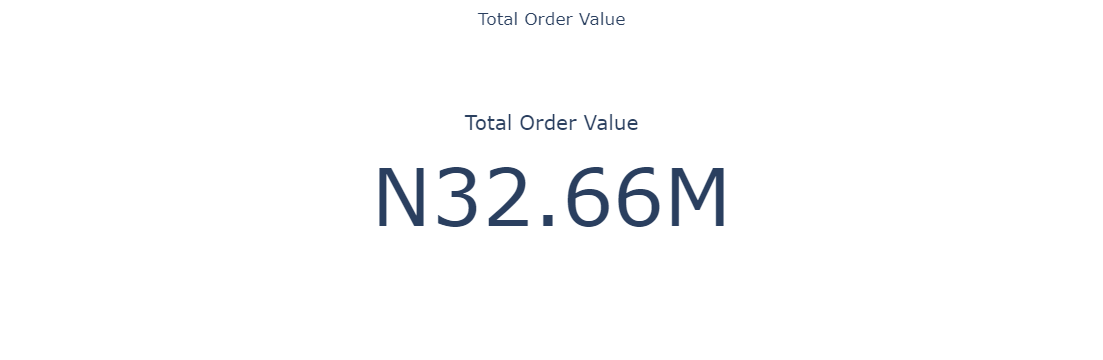

In [8]:
# Calculate the total order value
total_order_value = (df['Quantity'] * df['Unit Price']).sum()

# Create a card visual
fig = go.Figure(go.Indicator(
    mode="number",
    value=total_order_value,
    title={"text": "Total Order Value"},
    number={'prefix': 'N'},
))

# Update layout
fig.update_layout(
    title="Total Order Value",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=150,
    width=200,  # Adjust the width here
)

# Show the figure
fig.show()

In [9]:
average_order_value = total_order_value / unique_orders
average_order_value

52585.47020933977

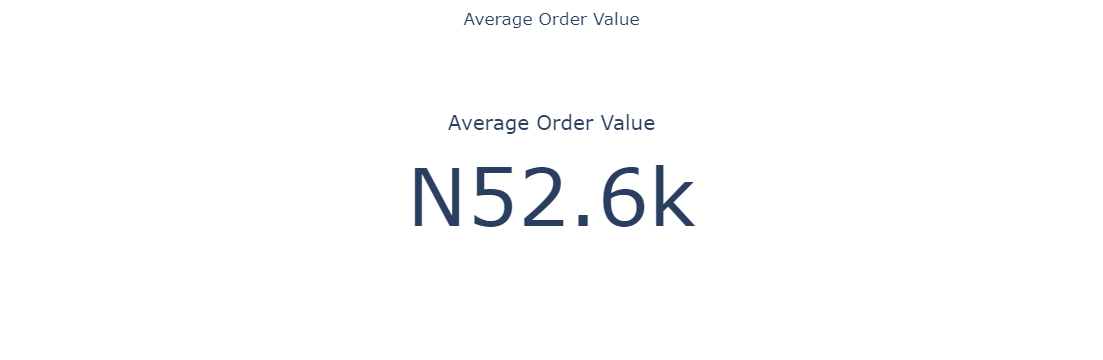

In [10]:
# Calculate the average order value
average_order_value = total_order_value / unique_orders

# Create a card visual
fig = go.Figure(go.Indicator(
    mode="number",
    value=average_order_value,
    title={"text": "Average Order Value"},
    number={'prefix': 'N'},
))

# Update layout
fig.update_layout(
    title="Average Order Value",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=150,
    width=200,  # Adjust the width here
)

# Show the figure
fig.show()

In [11]:
fulfilment_rate = df[df['shippingStatus'] == 'delivered'].shape[0] / unique_orders
fulfilment_rate

2.8824476650563606

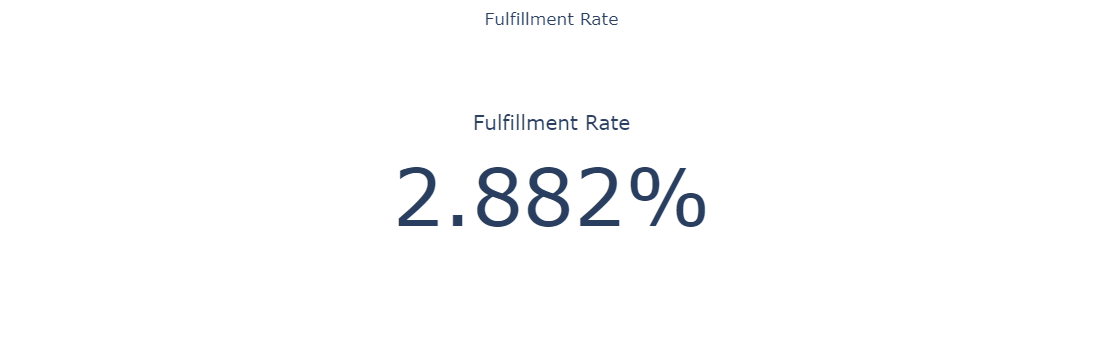

In [12]:
# Calculate fulfillment rate
fulfillment_rate = df[df['shippingStatus'] == 'delivered'].shape[0] / unique_orders

# Create a card visual
fig = go.Figure(go.Indicator(
    mode="number",
    value=fulfillment_rate,
    title={"text": "Fulfillment Rate"},
    number={'suffix': '%'},
))

# Update layout
fig.update_layout(
    title="Fulfillment Rate",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=150,
    width=200,  # Adjust the width here
)

# Show the figure
fig.show()

In [13]:
df['OrderedAt Date '] = pd.to_datetime(df['OrderedAt Date '])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])
df['Fulfilment Time'] = (df['Delivery Date'] - df['OrderedAt Date ']).dt.total_seconds() / 3600
average_fulfilment_time = df['Fulfilment Time'].mean()
average_fulfilment_time

33.83591294227188

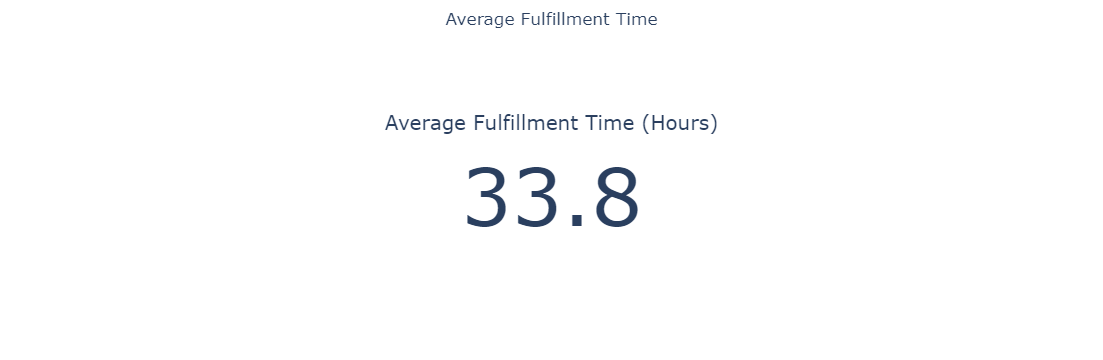

In [14]:
# Calculate average fulfillment time
average_fulfilment_time = df['Fulfilment Time'].mean()

# Create a card visual
fig = go.Figure(go.Indicator(
    mode="number",
    value=average_fulfilment_time,
    title={"text": "Average Fulfillment Time (Hours)"},
))

# Update layout
fig.update_layout(
    title="Average Fulfillment Time",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=150,
    width=200,  # Adjust the width here
)

# Show the figure
fig.show()

In [15]:
loss_sale = df[df['shippingStatus'] == 'cancelled'].shape[0]
loss_sale

256

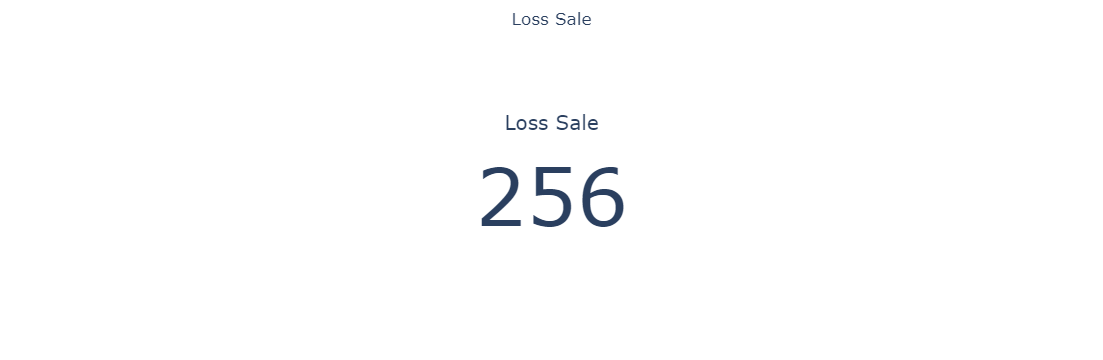

In [16]:
# Calculate the number of canceled orders
loss_sale = df[df['shippingStatus'] == 'cancelled'].shape[0]

# Create a card visual
fig = go.Figure(go.Indicator(
    mode="number",
    value=loss_sale,
    title={"text": "Loss Sale"},
))

# Update layout
fig.update_layout(
    title="Loss Sale",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=150,
    width=200,  # Adjust the width here
)

# Show the figure
fig.show()

In [17]:
unique_skus = df['Product'].nunique()
unique_skus

62

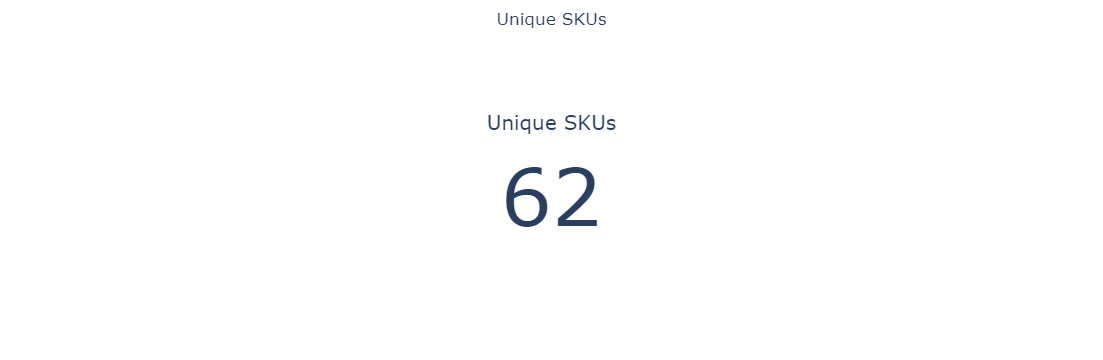

In [18]:
# Calculate the number of unique SKUs
unique_skus = df['Product'].nunique()

# Create a card visual
fig = go.Figure(go.Indicator(
    mode="number",
    value=unique_skus,
    title={"text": "Unique SKUs"},
))

# Update layout
fig.update_layout(
    title="Unique SKUs",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=150,
    width=200,  # Adjust the width here
)

# Show the figure
fig.show()


In [19]:
average_unique_skus_per_customer = unique_skus / unique_customers
average_unique_skus_per_customer

0.2551440329218107

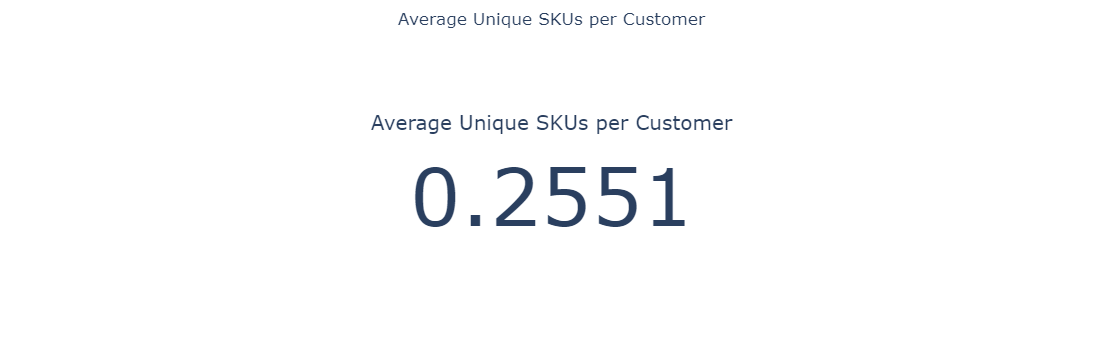

In [20]:
# Calculate the average unique SKUs per customer
average_unique_skus_per_customer = unique_skus / unique_customers

# Create a card visual
fig = go.Figure(go.Indicator(
    mode="number",
    value=average_unique_skus_per_customer,
    title={"text": "Average Unique SKUs per Customer"},
))

# Update layout
fig.update_layout(
    title="Average Unique SKUs per Customer",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=150,
    width=200,  # Adjust the width here
)

# Show the figure
fig.show()

# 2a) Analyse the Breakfast & Snacks category group indicating the market-leading product(s) in terms of distribution and sales value:

C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_7628\1912096487.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



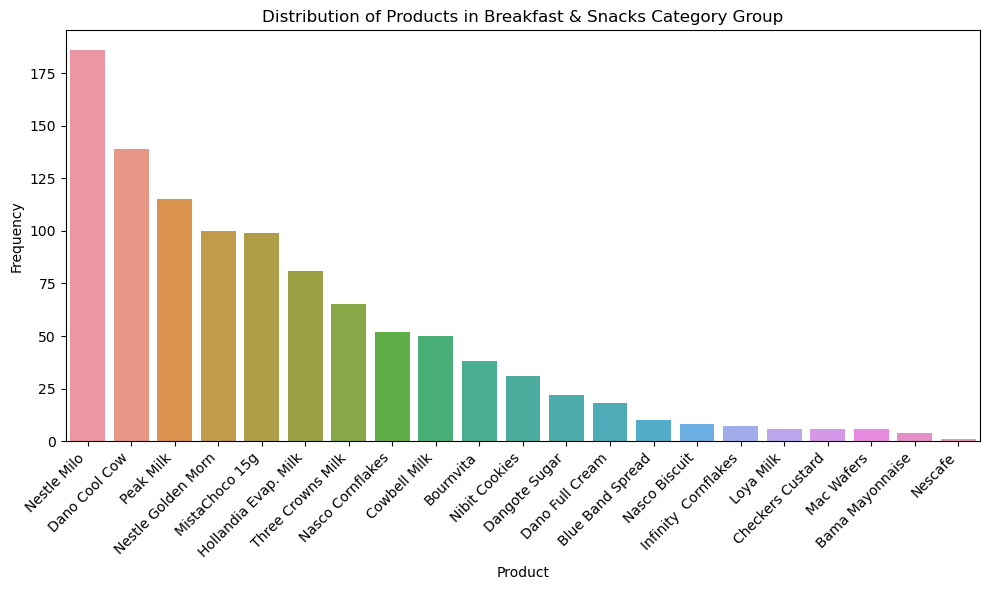

Total Sales Value for Each Product:
Product
Nestle Milo             5746840.0
Dano Cool Cow           3399537.5
Peak Milk               2370600.0
Nestle Golden Morn      1958775.0
Hollandia Evap. Milk    1806820.0
Three Crowns Milk       1110500.0
Bournvita                749200.0
Cowbell Milk             719050.0
Nasco Cornflakes         448500.0
Dano Full Cream          359120.0
Nibit Cookies            246000.0
Dangote Sugar            154350.0
MistaChoco 15g            99047.0
Blue Band Spread          85600.0
Checkers Custard          66300.0
Loya Milk                 66000.0
Bama Mayonnaise           50600.0
Nasco Biscuit             36300.0
Infinity  Cornflakes      29450.0
Mac Wafers                27540.0
Nescafe                   21200.0
Name: Total Sales Value, dtype: float64


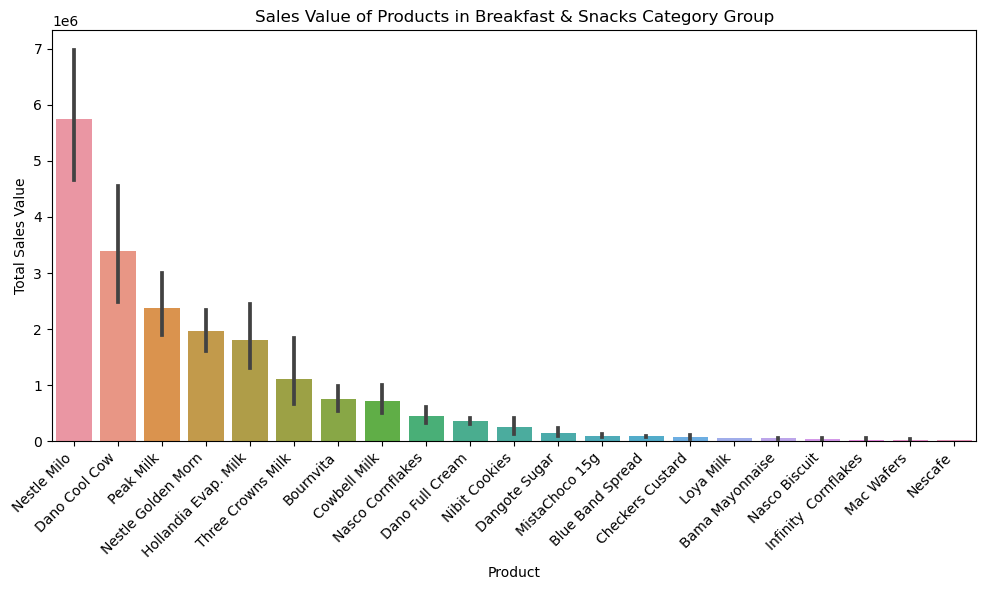

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Breakfast & Snacks category group
breakfast_snacks_df = df[df['Category Group'] == 'Breakfast & Snacks']

# Calculate total sales value for each product
breakfast_snacks_df['Total Sales Value'] = breakfast_snacks_df['Quantity'] * breakfast_snacks_df['Unit Price']
product_sales = breakfast_snacks_df.groupby('Product')['Total Sales Value'].sum().sort_values(ascending=False)

# Plotting distribution of products
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=breakfast_snacks_df, order=breakfast_snacks_df['Product'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Products in Breakfast & Snacks Category Group')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Display total sales value for each product
print("Total Sales Value for Each Product:")
print(product_sales)

# Plotting sales value of products
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Total Sales Value', data=breakfast_snacks_df, estimator=sum, order=product_sales.index)
plt.xticks(rotation=45, ha='right')
plt.title('Sales Value of Products in Breakfast & Snacks Category Group')
plt.xlabel('Product')
plt.ylabel('Total Sales Value')
plt.tight_layout()
plt.show()

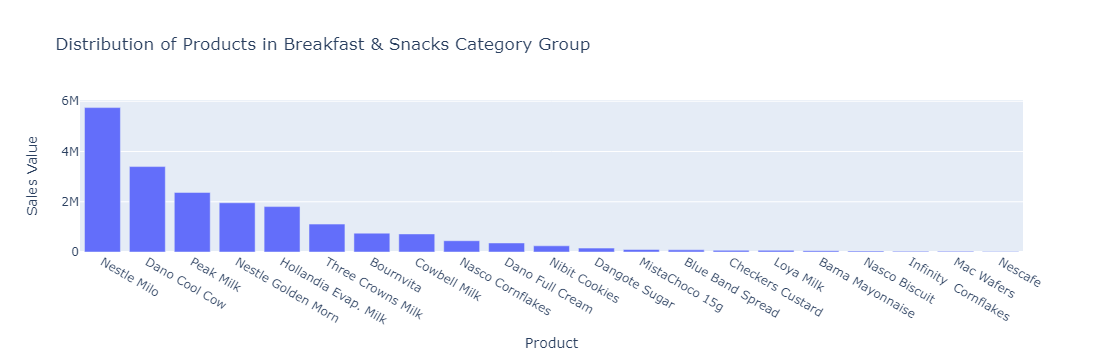

Total Sales Value for Each Product:
                 Product  Total Sales Value
0        Bama Mayonnaise            50600.0
1       Blue Band Spread            85600.0
2              Bournvita           749200.0
3       Checkers Custard            66300.0
4           Cowbell Milk           719050.0
5          Dangote Sugar           154350.0
6          Dano Cool Cow          3399537.5
7        Dano Full Cream           359120.0
8   Hollandia Evap. Milk          1806820.0
9   Infinity  Cornflakes            29450.0
10             Loya Milk            66000.0
11            Mac Wafers            27540.0
12        MistaChoco 15g            99047.0
13         Nasco Biscuit            36300.0
14      Nasco Cornflakes           448500.0
15               Nescafe            21200.0
16    Nestle Golden Morn          1958775.0
17           Nestle Milo          5746840.0
18         Nibit Cookies           246000.0
19             Peak Milk          2370600.0
20     Three Crowns Milk          111050

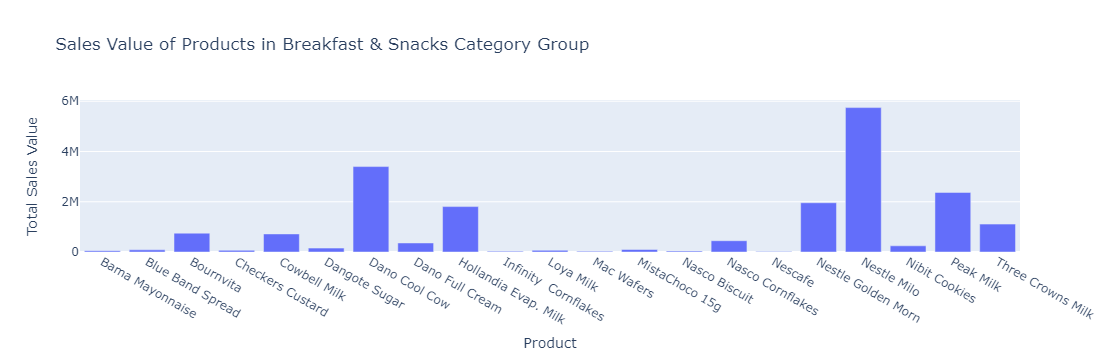

In [22]:
# Calculate total sales value for each product
product_sales = breakfast_snacks_df.groupby('Product')['Total Sales Value'].sum().reset_index()

# Plotting distribution of products
fig = px.bar(product_sales, x='Product', y='Total Sales Value', 
             title='Distribution of Products in Breakfast & Snacks Category Group',
             labels={'Total Sales Value': 'Sales Value'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# Display total sales value for each product
print("Total Sales Value for Each Product:")
print(product_sales)

# Plotting sales value of products
fig = px.bar(product_sales, x='Product', y='Total Sales Value',
             title='Sales Value of Products in Breakfast & Snacks Category Group')
fig.show()

# b) Which six producers contribute the most to the sales value and what are their five most popular variants with customers?

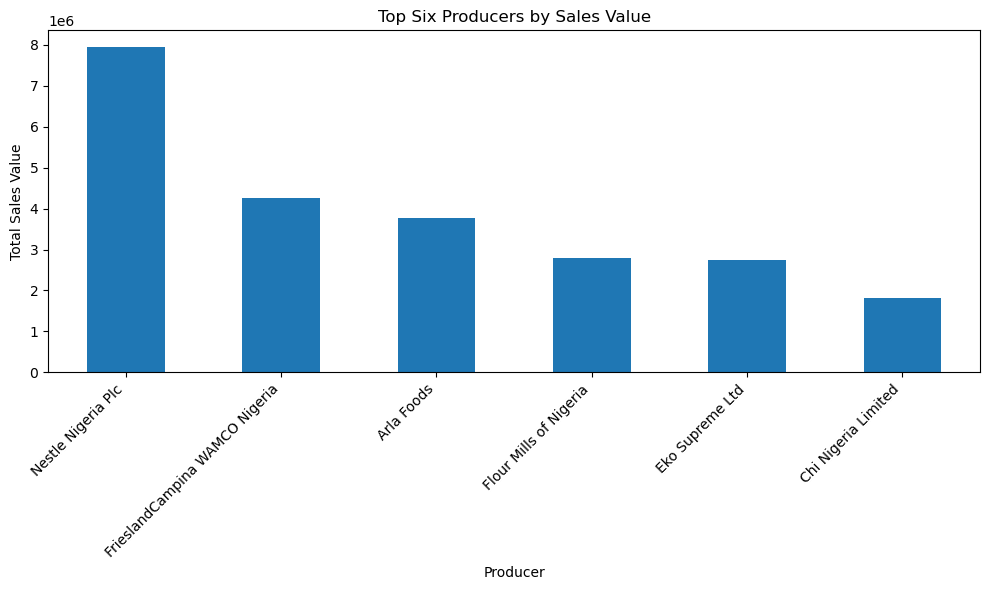

Total Sales Value for Each Producer:
Producer
Nestle Nigeria Plc                       7951075.0
FrieslandCampina WAMCO Nigeria           4245500.0
Arla Foods                               3758657.5
Flour Mills of Nigeria                   2782647.5
Eko Supreme Ltd                          2742290.0
Chi Nigeria Limited                      1806820.0
Hayat Kimya Nigeria Limited              1185300.0
PZ Cussons Nigeria Plc                   1079450.0
Promasidor                                785050.0
Cadbury Nigeria Plc                       749200.0
Unimer S.A                                707850.0
Sonia Foods Industries Ltd.               646100.0
Extreme Manufacturing Nig Ltd             620700.0
Olam Group Nigeria                        486300.0
Nasco                                     484800.0
Henkel Expand Global                      464500.0
DUFIL Prima foods Plc                     383370.0
Procter and Gamble                        332170.0
Fastizers Food Confectionery        

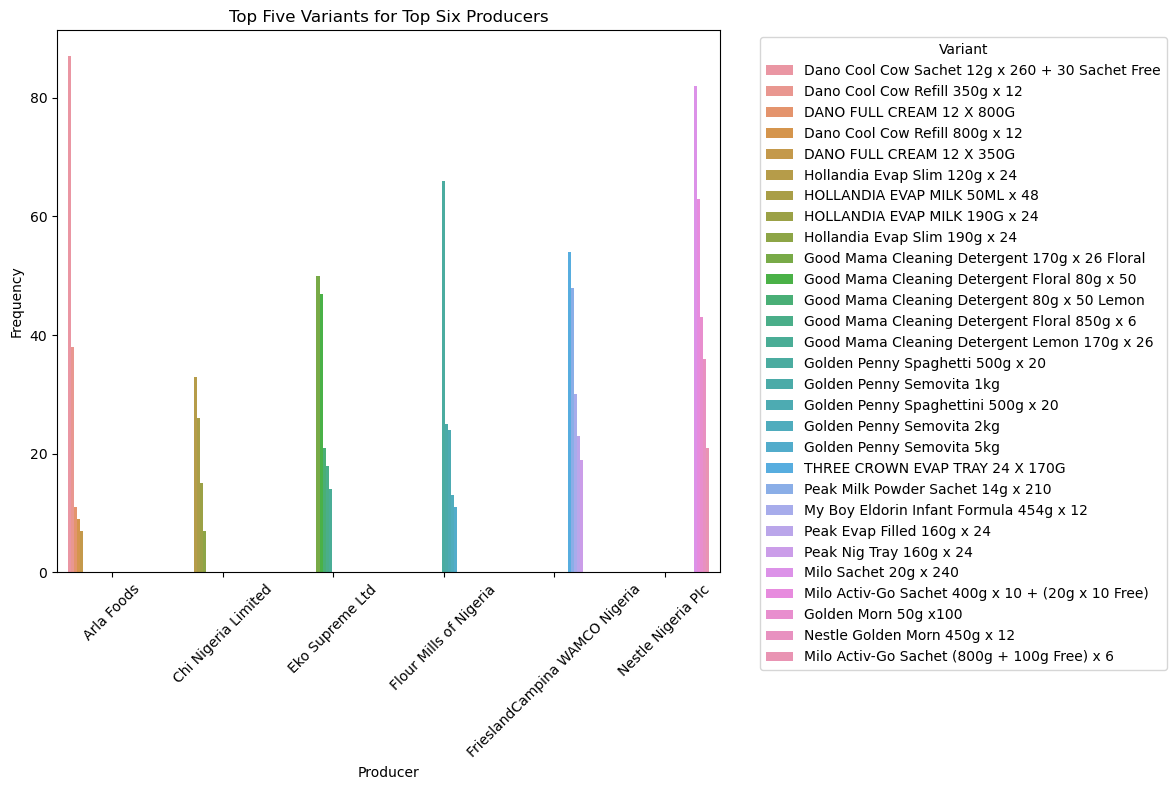

In [23]:
# Create a new column for total sales value
df['Total Sales Value'] = df['Quantity'] * df['Unit Price']

# Group by producer and calculate total sales value
producer_sales = df.groupby('Producer')['Total Sales Value'].sum().sort_values(ascending=False)

# Plotting top six producers by sales value
plt.figure(figsize=(10, 6))
producer_sales.head(6).plot(kind='bar')
plt.title('Top Six Producers by Sales Value')
plt.xlabel('Producer')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display total sales value for each producer
print("Total Sales Value for Each Producer:")
print(producer_sales)

# Getting five most popular variants for each of the top six producers
top_producers = producer_sales.head(6).index
top_producers_variants = df[df['Producer'].isin(top_producers)].groupby(['Producer', 'Variant']).size().reset_index(name='Count')
top_producers_variants = top_producers_variants.sort_values(by=['Producer', 'Count'], ascending=[True, False]).groupby('Producer').head(5)

# Display top five variants for each of the top six producers
print("Top Five Variants for Top Six Producers:")
print(top_producers_variants)

# Plotting top five variants for each of the top six producers
plt.figure(figsize=(12, 8))
sns.barplot(x='Producer', y='Count', hue='Variant', data=top_producers_variants)
plt.title('Top Five Variants for Top Six Producers')
plt.xlabel('Producer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

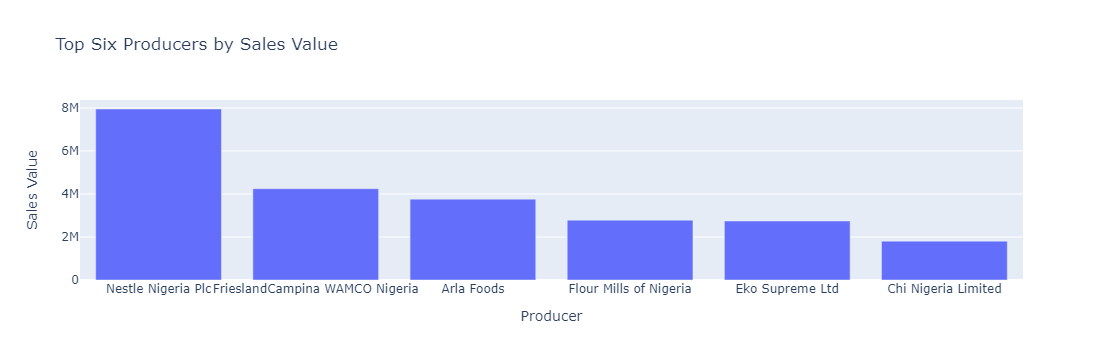

Total Sales Value for Each Producer:
                                 Producer  Total Sales Value
20                     Nestle Nigeria Plc          7951075.0
11         FrieslandCampina WAMCO Nigeria          4245500.0
1                              Arla Foods          3758657.5
10                 Flour Mills of Nigeria          2782647.5
6                         Eko Supreme Ltd          2742290.0
3                     Chi Nigeria Limited          1806820.0
13            Hayat Kimya Nigeria Limited          1185300.0
23                 PZ Cussons Nigeria Plc          1079450.0
25                             Promasidor           785050.0
2                     Cadbury Nigeria Plc           749200.0
30                             Unimer S.A           707850.0
26            Sonia Foods Industries Ltd.           646100.0
8           Extreme Manufacturing Nig Ltd           620700.0
22                     Olam Group Nigeria           486300.0
19                                  Nasco       

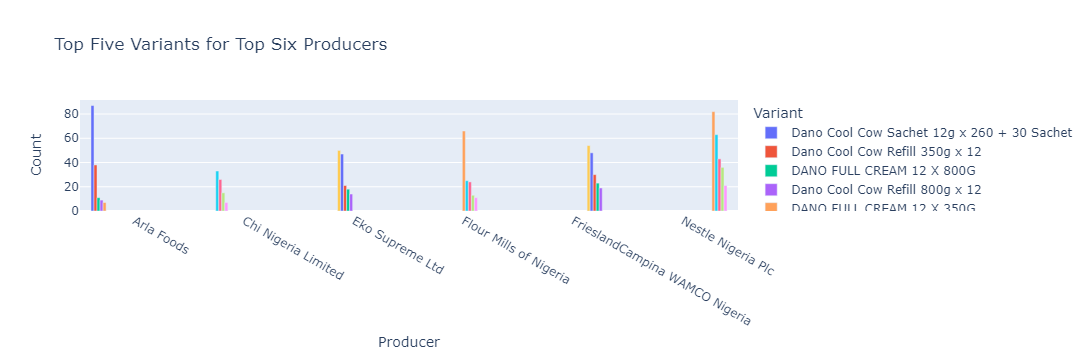

In [24]:
# Create a new column for total sales value
df['Total Sales Value'] = df['Quantity'] * df['Unit Price']

# Group by producer and calculate total sales value
producer_sales = df.groupby('Producer')['Total Sales Value'].sum().reset_index().sort_values(by='Total Sales Value', ascending=False)

# Plotting top six producers by sales value
fig = px.bar(producer_sales.head(6), x='Producer', y='Total Sales Value', 
             title='Top Six Producers by Sales Value',
             labels={'Total Sales Value': 'Sales Value'})
fig.show()

# Display total sales value for each producer
print("Total Sales Value for Each Producer:")
print(producer_sales)

# Getting five most popular variants for each of the top six producers
top_producers = producer_sales.head(6)['Producer'].tolist()
top_producers_variants = df[df['Producer'].isin(top_producers)].groupby(['Producer', 'Variant']).size().reset_index(name='Count')
top_producers_variants = top_producers_variants.sort_values(by=['Producer', 'Count'], ascending=[True, False]).groupby('Producer').head(5)

# Display top five variants for each of the top six producers
print("Top Five Variants for Top Six Producers:")
print(top_producers_variants)

# Plotting top five variants for each of the top six producers
fig = px.bar(top_producers_variants, x='Producer', y='Count', color='Variant', barmode='group',
             title='Top Five Variants for Top Six Producers')
fig.show()

# c) Which customer type has the highest average order value and which channels are the most used by customer type?

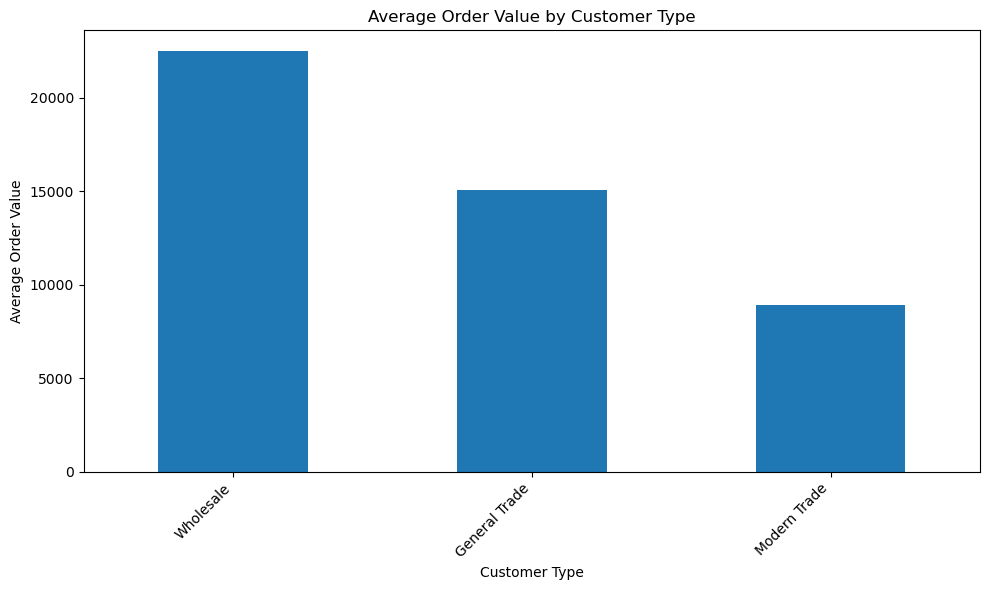

Average Order Value by Customer Type:
Customer Type
Wholesale        22484.631922
General Trade    15089.929518
Modern Trade      8905.215190
Name: Total Sales Value, dtype: float64


In [25]:
# Group by customer type and calculate average order value
avg_order_value_by_customer_type = df.groupby('Customer Type')['Total Sales Value'].mean().sort_values(ascending=False)

# Plotting average order value by customer type
plt.figure(figsize=(10, 6))
avg_order_value_by_customer_type.plot(kind='bar')
plt.title('Average Order Value by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print numerical values
print("Average Order Value by Customer Type:")
print(avg_order_value_by_customer_type)

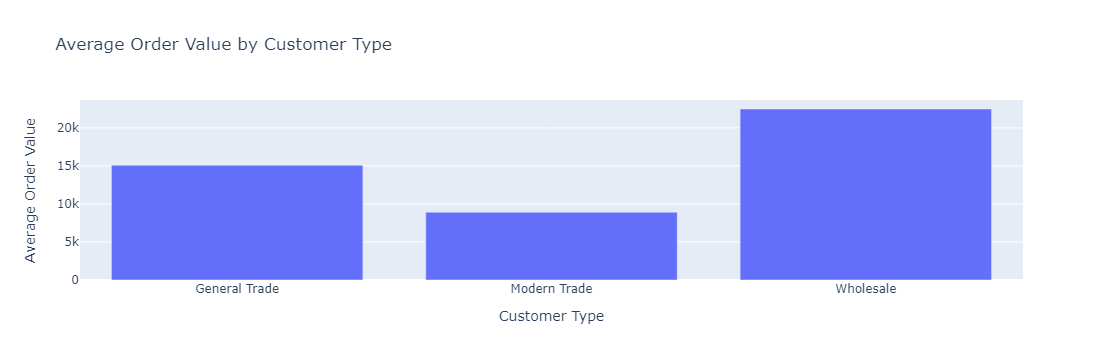

Average Order Value by Customer Type:
   Customer Type  Total Sales Value
0  General Trade       15089.929518
1   Modern Trade        8905.215190
2      Wholesale       22484.631922


In [26]:
# Group by customer type and calculate average order value
avg_order_value_by_customer_type = df.groupby('Customer Type')['Total Sales Value'].mean().reset_index()

# Plotting average order value by customer type
fig = px.bar(avg_order_value_by_customer_type, x='Customer Type', y='Total Sales Value',
             title='Average Order Value by Customer Type',
             labels={'Total Sales Value': 'Average Order Value'})
fig.show()

# Print numerical values
print("Average Order Value by Customer Type:")
print(avg_order_value_by_customer_type)


# d) Analyse the number of orders by time of day showing peak periods during the day. Is there any tangible difference in order times across the order channels?

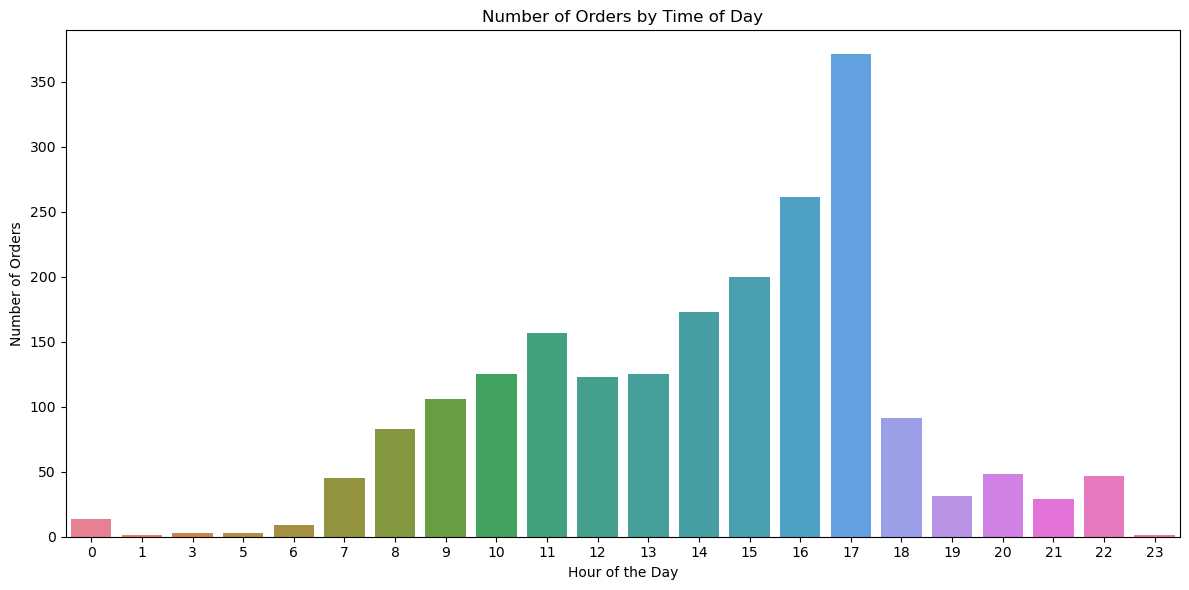

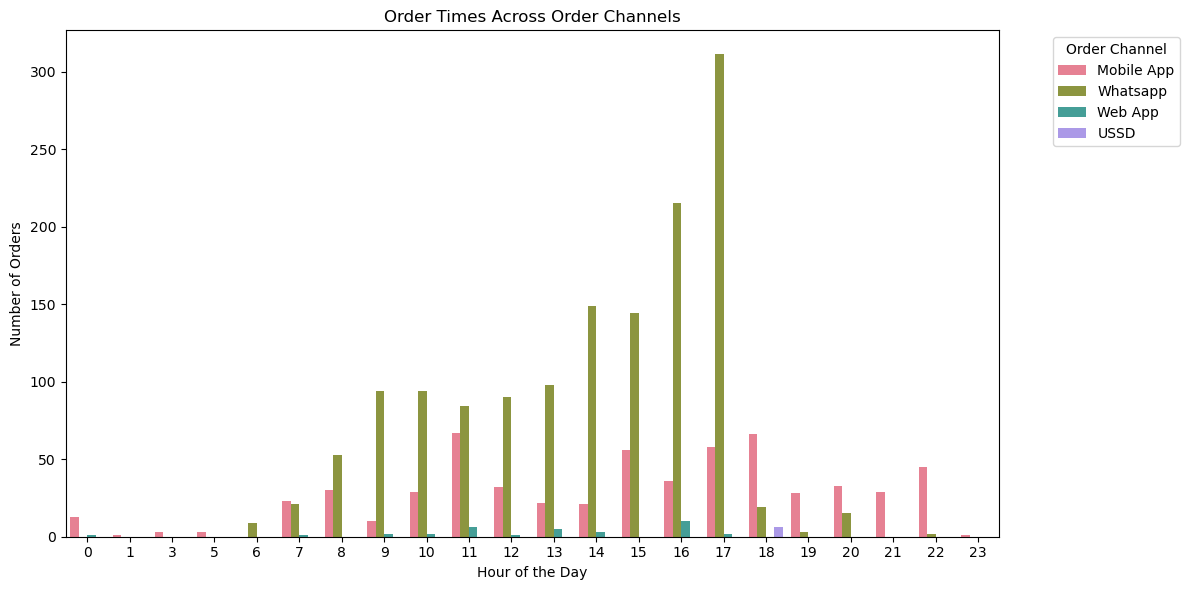

Number of Orders by Time of Day:
OrderedAt Hour
0      14
1       1
3       3
5       3
6       9
7      45
8      83
9     106
10    125
11    157
12    123
13    125
14    173
15    200
16    261
17    371
18     91
19     31
20     48
21     29
22     47
23      1
Name: count, dtype: int64

Order Times Across Order Channels:
Order Channel   Mobile App  USSD  Web App  Whatsapp
OrderedAt Hour                                     
0                     13.0   0.0      1.0       0.0
1                      1.0   0.0      0.0       0.0
3                      3.0   0.0      0.0       0.0
5                      3.0   0.0      0.0       0.0
6                      0.0   0.0      0.0       9.0
7                     23.0   0.0      1.0      21.0
8                     30.0   0.0      0.0      53.0
9                     10.0   0.0      2.0      94.0
10                    29.0   0.0      2.0      94.0
11                    67.0   0.0      6.0      84.0
12                    32.0   0.0      1.0     

In [27]:
# Extracting hour from OrderedAt Date
df['OrderedAt Hour'] = df['OrderedAt Date '].dt.hour

# Plotting number of orders by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='OrderedAt Hour', data=df, palette='husl')
plt.title('Number of Orders by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Plotting order times across order channels
plt.figure(figsize=(12, 6))
sns.countplot(x='OrderedAt Hour', hue='Order Channel', data=df, palette='husl')
plt.title('Order Times Across Order Channels')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.legend(title='Order Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Displaying number of orders by time of day
print("Number of Orders by Time of Day:")
print(df['OrderedAt Hour'].value_counts().sort_index())

# Displaying order times across order channels
print("\nOrder Times Across Order Channels:")
print(df.groupby(['OrderedAt Hour', 'Order Channel']).size().unstack().fillna(0))


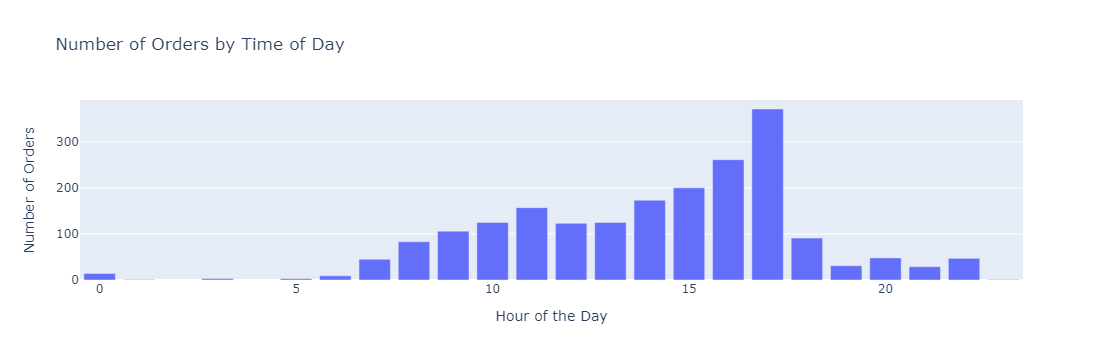

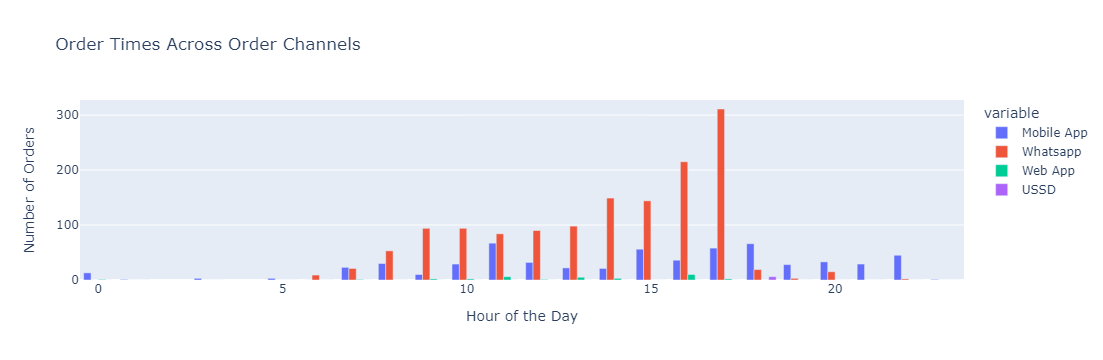

In [28]:
# Plotting number of orders by time of day
fig1 = px.bar(df['OrderedAt Hour'].value_counts().sort_index(), 
              x=df['OrderedAt Hour'].value_counts().sort_index().index, 
              y=df['OrderedAt Hour'].value_counts().sort_index().values,
              labels={'x': 'Hour of the Day', 'y': 'Number of Orders'},
              title='Number of Orders by Time of Day')
fig1.show()

# Plotting order times across order channels
fig2 = px.bar(df.groupby(['OrderedAt Hour', 'Order Channel']).size().unstack().fillna(0).reset_index(), 
              x='OrderedAt Hour', 
              y=[col for col in df['Order Channel'].unique()],
              labels={'OrderedAt Hour': 'Hour of the Day', 'value': 'Number of Orders'},
              title='Order Times Across Order Channels',
              barmode='group')
fig2.show()


# e) Which three producers dominate the Food category group and what variants drive that dominance?

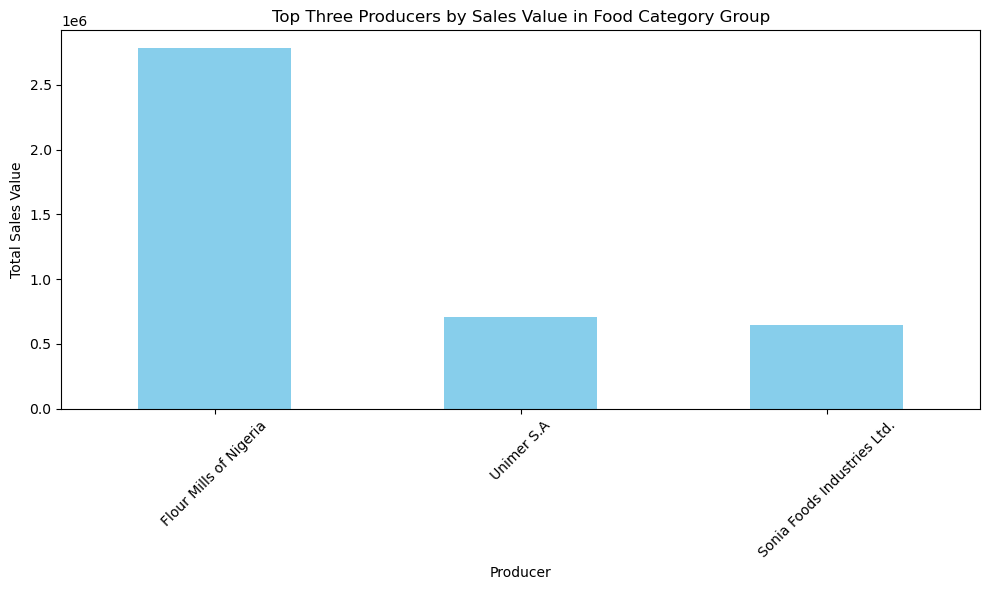

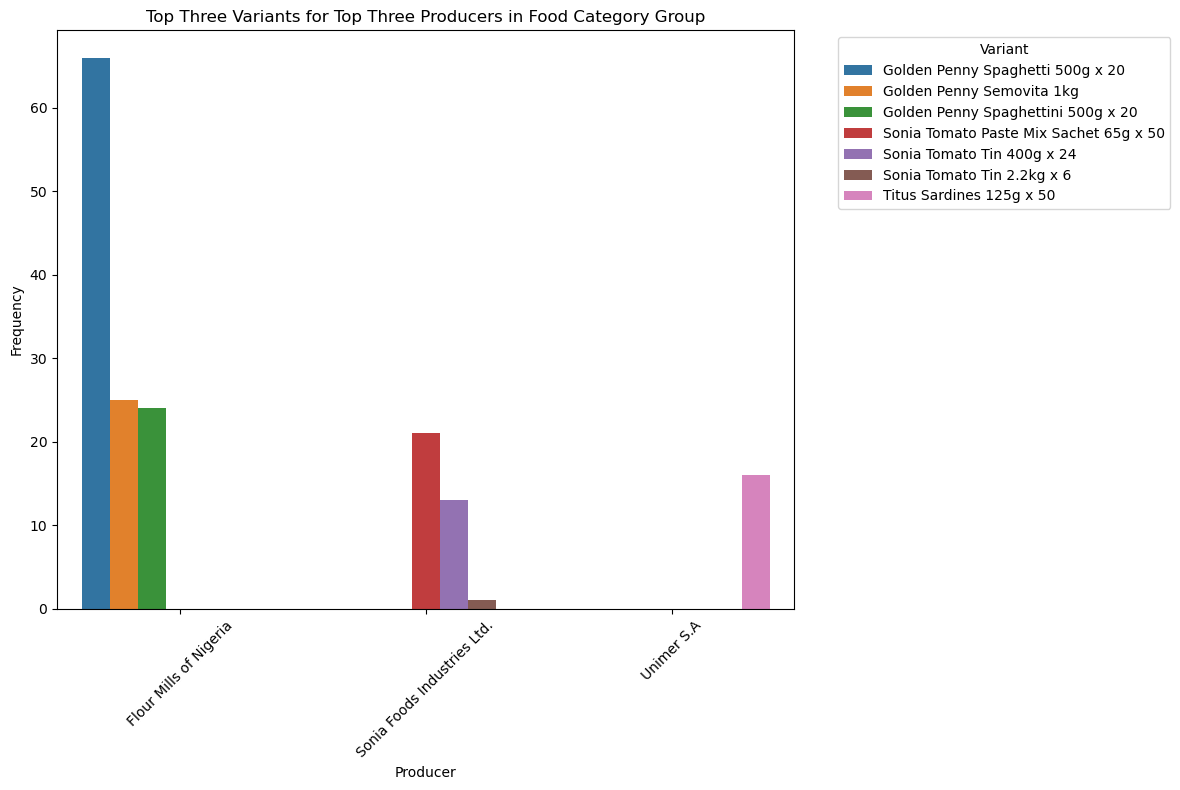

Top Variants for Top Three Producers:
                       Producer                                 Variant  Count
6        Flour Mills of Nigeria        Golden Penny Spaghetti 500g x 20     66
2        Flour Mills of Nigeria               Golden Penny Semovita 1kg     25
7        Flour Mills of Nigeria      Golden Penny Spaghettini 500g x 20     24
8   Sonia Foods Industries Ltd.  Sonia Tomato Paste Mix Sachet 65g x 50     21
10  Sonia Foods Industries Ltd.              Sonia Tomato Tin 400g x 24     13
9   Sonia Foods Industries Ltd.              Sonia Tomato Tin 2.2kg x 6      1
11                   Unimer S.A                Titus Sardines 125g x 50     16


In [29]:
# Filter data for Food category group
food_df = df[df['Category Group'] == 'Food']

# Group by producer and calculate total sales value
food_producer_sales = food_df.groupby('Producer')['Total Sales Value'].sum().sort_values(ascending=False)

# Plotting top three producers by sales value in Food category group
plt.figure(figsize=(10, 6))
food_producer_sales.head(3).plot(kind='bar', color='skyblue')
plt.title('Top Three Producers by Sales Value in Food Category Group')
plt.xlabel('Producer')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Getting variants for each of the top three producers
top_food_producers = food_producer_sales.head(3).index
top_food_producers_variants = food_df[food_df['Producer'].isin(top_food_producers)].groupby(['Producer', 'Variant']).size().reset_index(name='Count')
top_food_producers_variants = top_food_producers_variants.sort_values(by=['Producer', 'Count'], ascending=[True, False]).groupby('Producer').head(3)

# Plotting top three variants for each of the top three producers
plt.figure(figsize=(12, 8))
sns.barplot(x='Producer', y='Count', hue='Variant', data=top_food_producers_variants)
plt.title('Top Three Variants for Top Three Producers in Food Category Group')
plt.xlabel('Producer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Printing top variants for each of the top three producers
print("Top Variants for Top Three Producers:")
print(top_food_producers_variants)


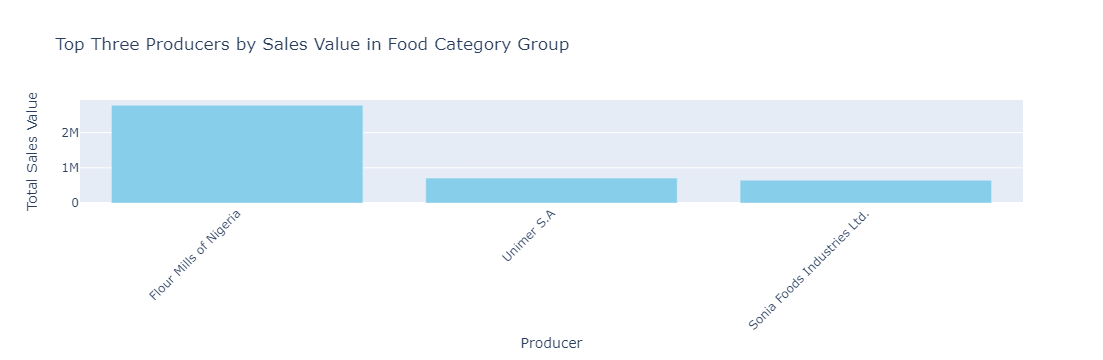

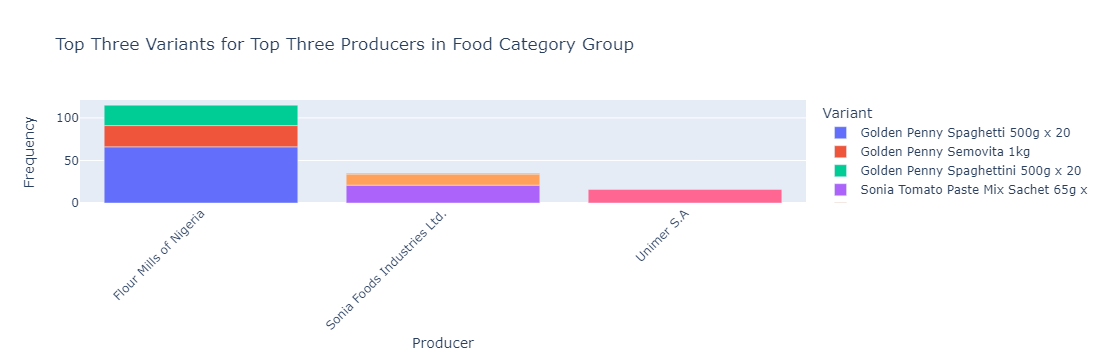

Top Variants for Top Three Producers:
                       Producer                                 Variant  Count
6        Flour Mills of Nigeria        Golden Penny Spaghetti 500g x 20     66
2        Flour Mills of Nigeria               Golden Penny Semovita 1kg     25
7        Flour Mills of Nigeria      Golden Penny Spaghettini 500g x 20     24
8   Sonia Foods Industries Ltd.  Sonia Tomato Paste Mix Sachet 65g x 50     21
10  Sonia Foods Industries Ltd.              Sonia Tomato Tin 400g x 24     13
9   Sonia Foods Industries Ltd.              Sonia Tomato Tin 2.2kg x 6      1
11                   Unimer S.A                Titus Sardines 125g x 50     16


In [30]:
# Filter data for Food category group
food_df = df[df['Category Group'] == 'Food']

# Group by producer and calculate total sales value
food_producer_sales = food_df.groupby('Producer')['Total Sales Value'].sum().sort_values(ascending=False)

# Plotting top three producers by sales value in Food category group
fig = px.bar(food_producer_sales.head(3), 
             x=food_producer_sales.head(3).index, 
             y=food_producer_sales.head(3).values,
             labels={'x': 'Producer', 'y': 'Total Sales Value'},
             title='Top Three Producers by Sales Value in Food Category Group',
             color_discrete_sequence=['skyblue'])

fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Getting variants for each of the top three producers
top_food_producers = food_producer_sales.head(3).index
top_food_producers_variants = food_df[food_df['Producer'].isin(top_food_producers)].groupby(['Producer', 'Variant']).size().reset_index(name='Count')
top_food_producers_variants = top_food_producers_variants.sort_values(by=['Producer', 'Count'], ascending=[True, False]).groupby('Producer').head(3)

# Plotting top three variants for each of the top three producers
fig = px.bar(top_food_producers_variants, 
             x='Producer', 
             y='Count',
             color='Variant',
             title='Top Three Variants for Top Three Producers in Food Category Group',
             labels={'Producer': 'Producer', 'Count': 'Frequency', 'Variant': 'Variant'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Printing top variants for each of the top three producers
print("Top Variants for Top Three Producers:")
print(top_food_producers_variants)


# f) Is there any significant difference in the popularity of Home Care variants across customer types or order channels?

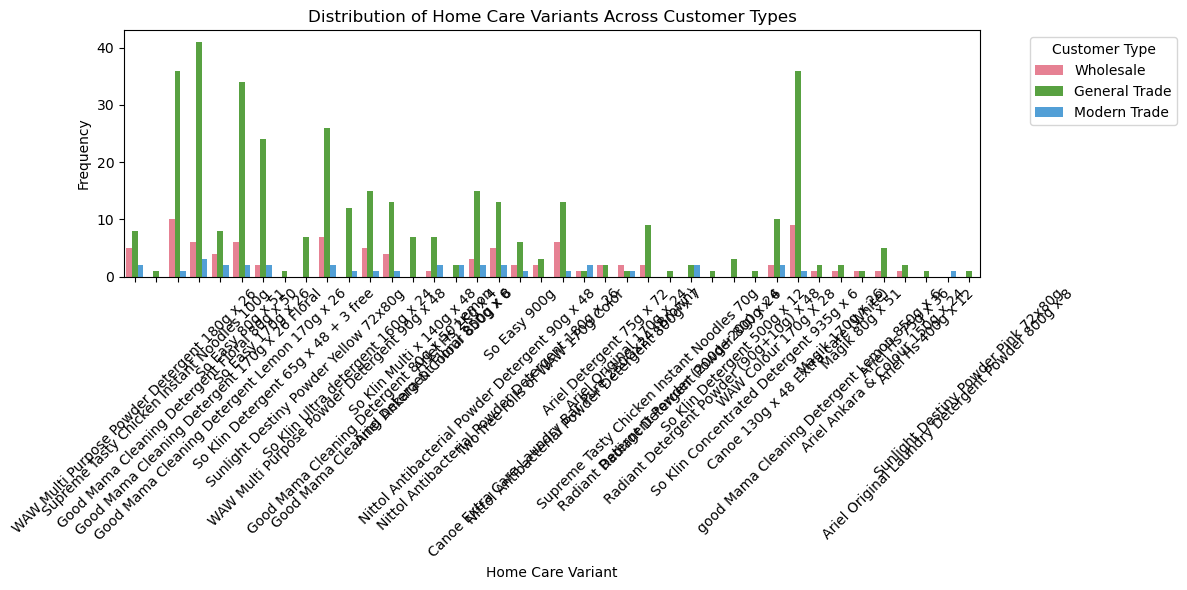

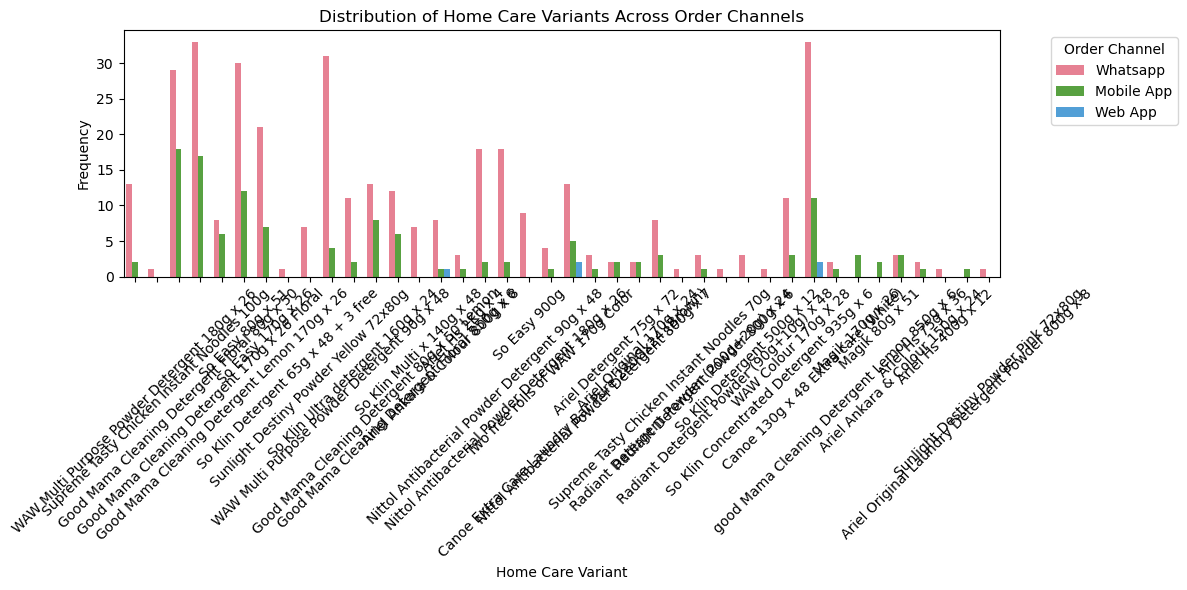

Chi-square test results for Customer Type and Home Care Variant:
Chi-square statistic: 95.39197054160078
P-value: 0.08800647451108064

Chi-square test results for Order Channel and Home Care Variant:
Chi-square statistic: 89.94203310453341
P-value: 0.1675143595220538


In [31]:
from scipy.stats import chi2_contingency
# Filter data for Home Care variants
home_care_df = df[df['Category Group'] == 'Home Care']

# Plotting distribution of Home Care variants across customer types
plt.figure(figsize=(12, 6))
sns.countplot(x='Variant', hue='Customer Type', data=home_care_df, palette='husl')
plt.title('Distribution of Home Care Variants Across Customer Types')
plt.xlabel('Home Care Variant')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting distribution of Home Care variants across order channels
plt.figure(figsize=(12, 6))
sns.countplot(x='Variant', hue='Order Channel', data=home_care_df, palette='husl')
plt.title('Distribution of Home Care Variants Across Order Channels')
plt.xlabel('Home Care Variant')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Order Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Perform chi-square test for independence between Customer Type and Home Care Variant
ct_variant_ct = pd.crosstab(home_care_df['Customer Type'], home_care_df['Variant'])
chi2, p, dof, expected = chi2_contingency(ct_variant_ct)
print("Chi-square test results for Customer Type and Home Care Variant:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Perform chi-square test for independence between Order Channel and Home Care Variant
oc_variant_ct = pd.crosstab(home_care_df['Order Channel'], home_care_df['Variant'])
chi2, p, dof, expected = chi2_contingency(oc_variant_ct)
print("\nChi-square test results for Order Channel and Home Care Variant:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


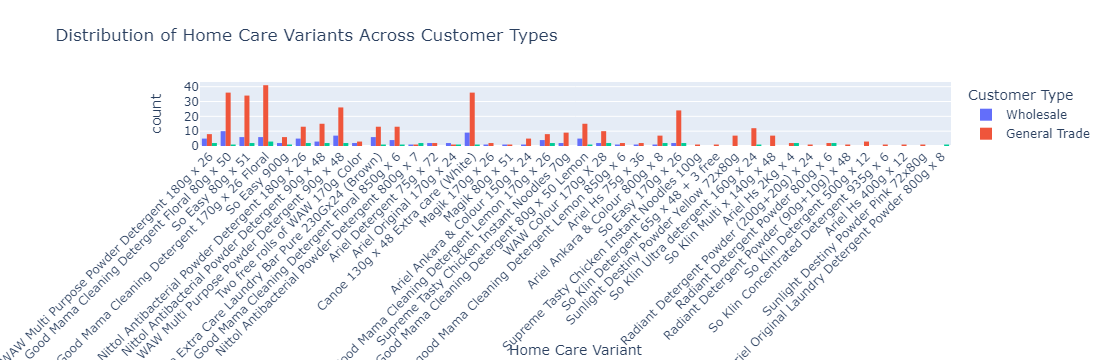

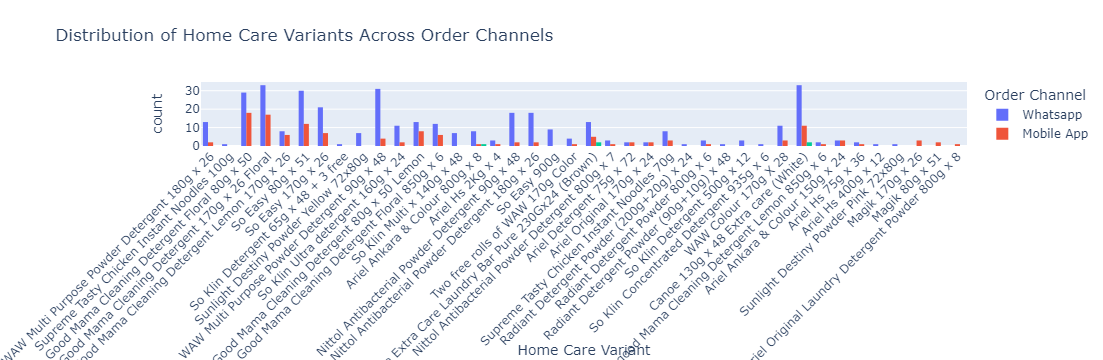

In [32]:
# Filter data for Home Care variants
home_care_df = df[df['Category Group'] == 'Home Care']

# Plotting distribution of Home Care variants across customer types
fig = px.histogram(home_care_df, x='Variant', color='Customer Type', barmode='group', 
                   title='Distribution of Home Care Variants Across Customer Types',
                   labels={'Variant': 'Home Care Variant', 'count': 'Frequency', 'Customer Type': 'Customer Type'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Plotting distribution of Home Care variants across order channels
fig = px.histogram(home_care_df, x='Variant', color='Order Channel', barmode='group', 
                   title='Distribution of Home Care Variants Across Order Channels',
                   labels={'Variant': 'Home Care Variant', 'count': 'Frequency', 'Order Channel': 'Order Channel'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


## Insights

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules
# i) Variants Most Likely to be Bought Together:
basket = (df.groupby(['Order No.', 'Variant'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order No.'))

# Convert quantity values to binary values indicating whether a variant was bought or not
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets with minimum support threshold
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort the rules by confidence to find the most likely pairs
sorted_rules = rules.sort_values(by='confidence', ascending=False)

# Display the top rules
print(sorted_rules.head())


# ii) Variants with the Highest Order Frequencies:
# Count the frequency of each variant
top_variants = df['Variant'].value_counts().head(3)

# iii) Rate of Purchase for High-Valued SKUs and Average Order Frequency:
# Categorize SKUs into high-valued and lower-valued
high_valued_skus = df[df['Total Sales Value'] > 10000]
lower_valued_skus = df[df['Total Sales Value'] <= 10000]

# Calculate rate of purchase for both bands
high_valued_purchase_rate = len(high_valued_skus) / len(df)
lower_valued_purchase_rate = len(lower_valued_skus) / len(df)

# Calculate average order frequency for both bands
high_valued_avg_order_frequency = high_valued_skus['Order No.'].nunique() / len(high_valued_skus)
lower_valued_avg_order_frequency = lower_valued_skus['Order No.'].nunique() / len(lower_valued_skus)

# Display the results
print("i) Variants Most Likely to be Bought Together:")
# Display results for association rule mining

print("\nii) Variants with the Highest Order Frequencies:")
print(top_variants)

print("\niii) Rate of Purchase for High-Valued SKUs and Average Order Frequency:")
print("Rate of Purchase for High-Valued SKUs:", high_valued_purchase_rate)
print("Rate of Purchase for Lower-Valued SKUs:", lower_valued_purchase_rate)
print("Average Order Frequency for High-Valued SKUs:", high_valued_avg_order_frequency)
print("Average Order Frequency for Lower-Valued SKUs:", lower_valued_avg_order_frequency)


C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_7628\1317333534.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



                                       antecedents  \
0                  (One Free Hanger of MistaChoco)   
1  (MistaChoco and Sistachoco Promo Pack 15g x 50)   

                                       consequents  antecedent support  \
0  (MistaChoco and Sistachoco Promo Pack 15g x 50)            0.075684   
1                  (One Free Hanger of MistaChoco)            0.083736   

   consequent support   support  confidence       lift  leverage  conviction  \
0            0.083736  0.075684    1.000000  11.942308  0.069347         inf   
1            0.075684  0.075684    0.903846  11.942308  0.069347    9.612882   

   zhangs_metric  
0       0.991289  
1       1.000000  
i) Variants Most Likely to be Bought Together:

ii) Variants with the Highest Order Frequencies:
Variant
Dano Cool Cow Sachet 12g x 260 + 30 Sachet Free    87
Milo Sachet 20g x 240                              82
Golden Penny Spaghetti 500g x 20                   66
Name: count, dtype: int64

iii) Rate of Purchase 

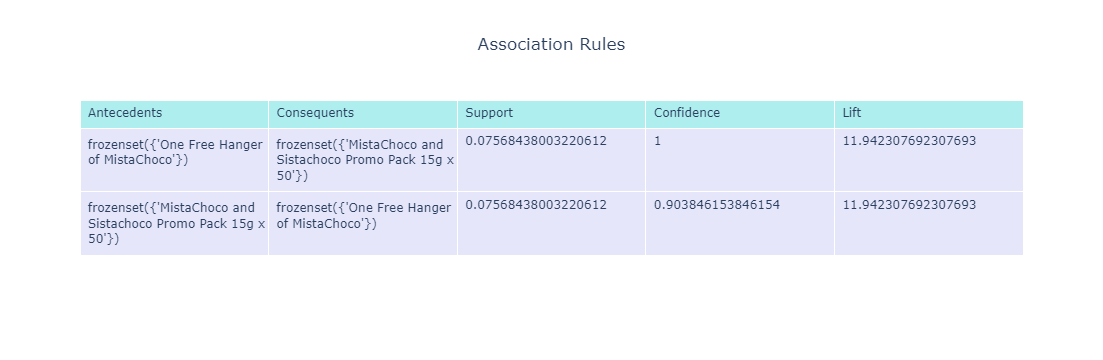

In [34]:
# Display association rules as a table
association_rules_table = go.Figure(data=[go.Table(
    header=dict(values=['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[sorted_rules['antecedents'].astype(str), 
                       sorted_rules['consequents'].astype(str),
                       sorted_rules['support'],
                       sorted_rules['confidence'],
                       sorted_rules['lift']],
               fill_color='lavender',
               align='left'))
])

association_rules_table.update_layout(title='Association Rules', title_x=0.5)
association_rules_table.show()

# 3a) Peak Delivery Time (Hours of the Day):

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



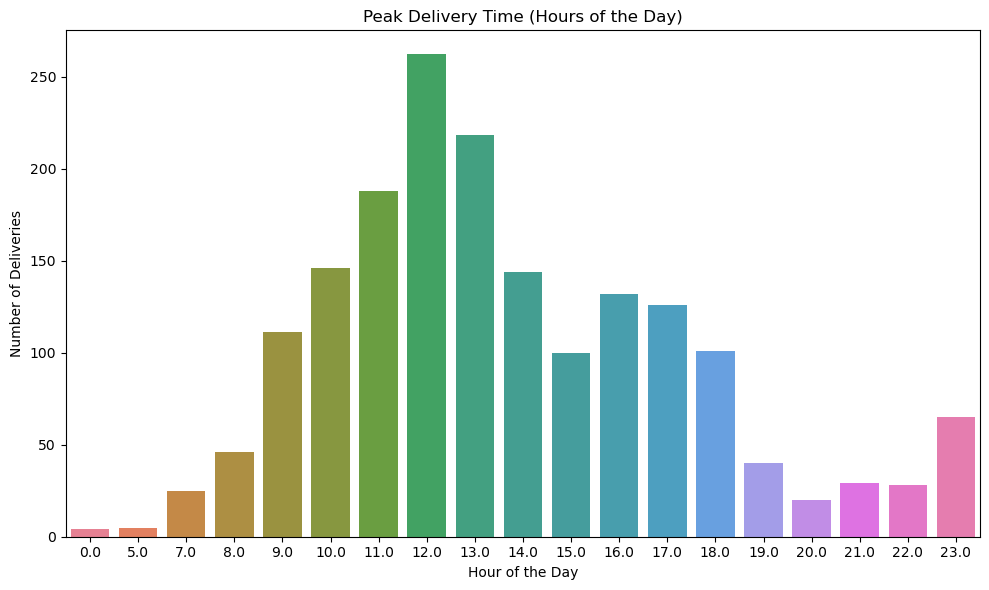

The peak delivery time is at 12.0:00 with 262 deliveries.


In [35]:
# Extracting hour from Delivery Date
df['Delivery Hour'] = df['Delivery Date'].dt.hour

# Counting deliveries by hour
delivery_counts = df['Delivery Hour'].value_counts().sort_index()

# Plotting peak delivery time
plt.figure(figsize=(10, 6))
sns.countplot(x='Delivery Hour', data=df, palette='husl')
plt.title('Peak Delivery Time (Hours of the Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Deliveries')
plt.tight_layout()
plt.show()

# Showing numerical results
peak_delivery_time = delivery_counts.idxmax()
peak_delivery_count = delivery_counts.max()
print(f"The peak delivery time is at {peak_delivery_time}:00 with {peak_delivery_count} deliveries.")

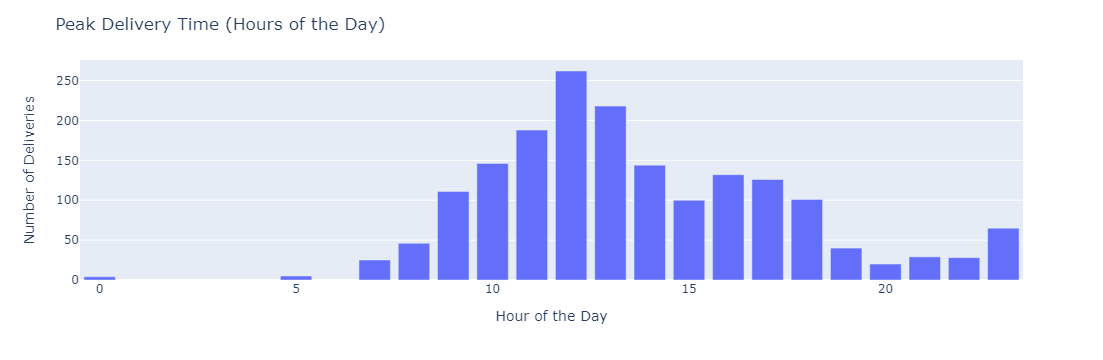

The peak delivery time is at 12.0:00 with 262 deliveries.


In [36]:
# Create a bar plot for peak delivery time
fig = px.bar(x=delivery_counts.index, y=delivery_counts.values, labels={'x': 'Hour of the Day', 'y': 'Number of Deliveries'})
fig.update_layout(title='Peak Delivery Time (Hours of the Day)', xaxis_title='Hour of the Day', yaxis_title='Number of Deliveries')
fig.show()

# Showing numerical results
peak_delivery_time = delivery_counts.idxmax()
peak_delivery_count = delivery_counts.max()
print(f"The peak delivery time is at {peak_delivery_time}:00 with {peak_delivery_count} deliveries.")

# b) Breakdown of Orders by Turnaround Time from Order to Fulfilment:

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



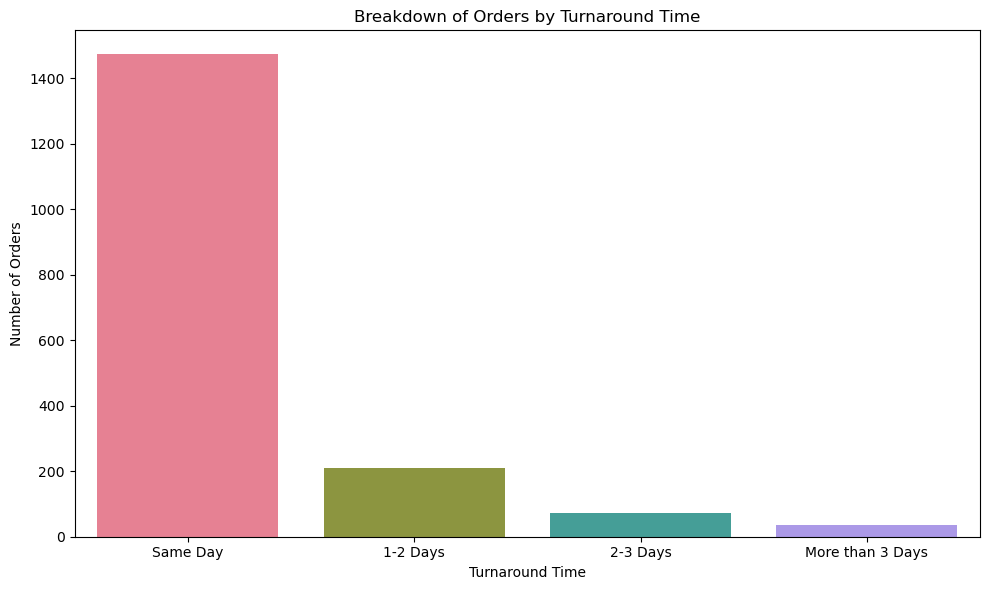

Percentage of orders delivered within the expected delivery timeline: 71.95%


In [37]:
# Calculate turnaround time
df['Turnaround Time'] = (df['Delivery Date'] - df['OrderedAt Date ']).dt.days

# Define bands for turnaround time
turnaround_time_bins = [-np.inf, 1, 2, 3, np.inf]
turnaround_time_labels = ['Same Day', '1-2 Days', '2-3 Days', 'More than 3 Days']

# Assigning labels to turnaround time bands
df['Turnaround Time Band'] = pd.cut(df['Turnaround Time'], bins=turnaround_time_bins, labels=turnaround_time_labels)

# Counting orders by turnaround time band
turnaround_time_counts = df['Turnaround Time Band'].value_counts()

# Plotting breakdown of orders by turnaround time
plt.figure(figsize=(10, 6))
sns.countplot(x='Turnaround Time Band', data=df, palette='husl')
plt.title('Breakdown of Orders by Turnaround Time')
plt.xlabel('Turnaround Time')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Showing numerical results
percentage_within_expected_timeline = (df[df['Turnaround Time'] <= 1].shape[0] / df.shape[0]) * 100
print(f"Percentage of orders delivered within the expected delivery timeline: {percentage_within_expected_timeline:.2f}%")

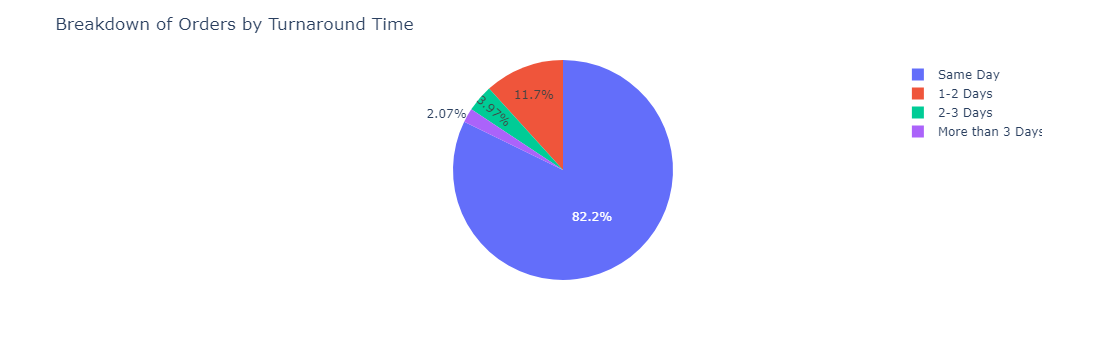

Percentage of orders delivered within the expected delivery timeline: 71.95%


In [38]:
# Create a pie chart for breakdown of orders by turnaround time
fig = px.pie(values=turnaround_time_counts.values, names=turnaround_time_counts.index, 
             labels={'value': 'Number of Orders', 'names': 'Turnaround Time'})
fig.update_layout(title='Breakdown of Orders by Turnaround Time')
fig.show()

# Showing numerical results
percentage_within_expected_timeline = (df[df['Turnaround Time'] <= 1].shape[0] / df.shape[0]) * 100
print(f"Percentage of orders delivered within the expected delivery timeline: {percentage_within_expected_timeline:.2f}%")

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



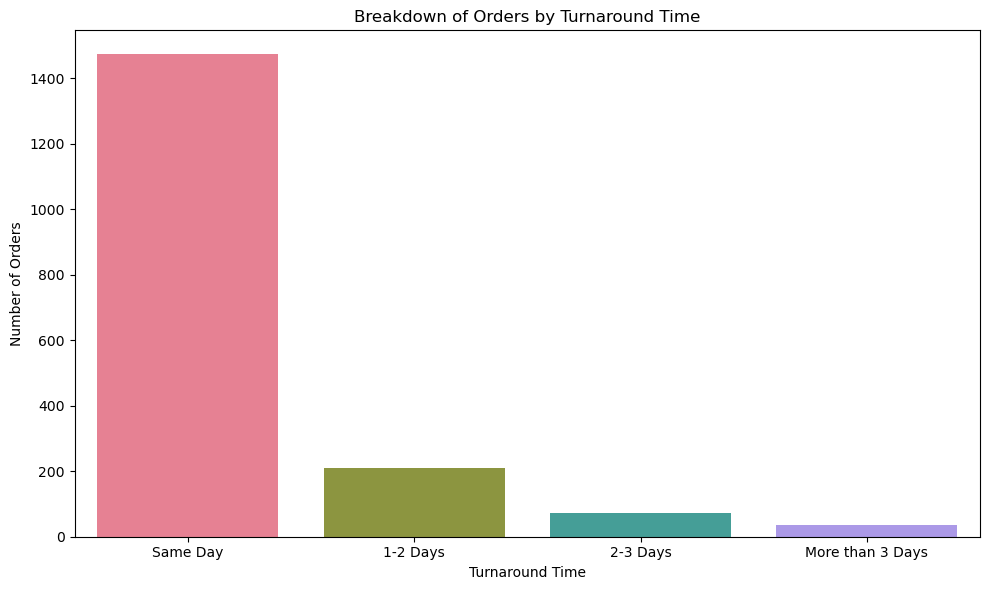

Number of Orders by Turnaround Time Band:
Turnaround Time Band
Same Day            1472
1-2 Days             210
2-3 Days              71
More than 3 Days      37
Name: count, dtype: int64


In [39]:
# Calculate turnaround time
df['Turnaround Time'] = (df['Delivery Date'] - df['OrderedAt Date ']).dt.days

# Define bands for turnaround time
turnaround_time_bins = [-np.inf, 1, 2, 3, np.inf]
turnaround_time_labels = ['Same Day', '1-2 Days', '2-3 Days', 'More than 3 Days']

# Assigning labels to turnaround time bands
df['Turnaround Time Band'] = pd.cut(df['Turnaround Time'], bins=turnaround_time_bins, labels=turnaround_time_labels)

# Counting orders by turnaround time band
turnaround_time_counts = df['Turnaround Time Band'].value_counts()

# Plotting breakdown of orders by turnaround time
plt.figure(figsize=(10, 6))
sns.countplot(x='Turnaround Time Band', data=df, palette='husl')
plt.title('Breakdown of Orders by Turnaround Time')
plt.xlabel('Turnaround Time')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Showing numerical results
print("Number of Orders by Turnaround Time Band:")
print(turnaround_time_counts)

# c) Fulfilment Rate by the Top 10 Delivery Agents:

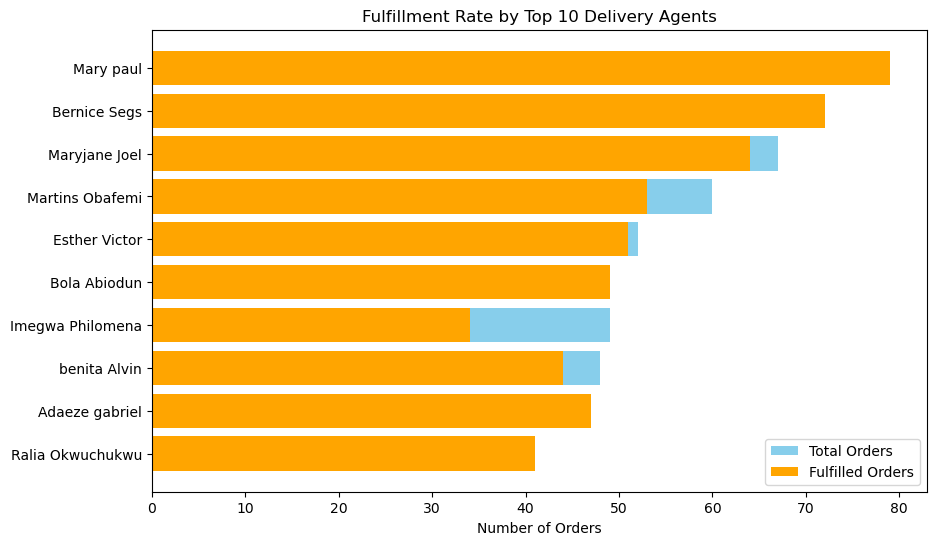

Top 10 Delivery Agents:
                  total_orders  fulfillment_rate
Delivery Agent                                  
Mary paul                   79          1.000000
Bernice Segs                72          1.000000
Maryjane Joel               67          0.955224
Martins Obafemi             60          0.883333
Esther Victor               52          0.980769
Bola Abiodun                49          1.000000
Imegwa Philomena            49          0.693878
benita Alvin                48          0.916667
Adaeze gabriel              47          1.000000
Ralia Okwuchukwu            41          1.000000


In [40]:
# Group data by Delivery Agent and calculate the total number of orders and fulfillment rate
delivery_agent_stats = df.groupby('Delivery Agent').agg(
    total_orders=('Order No.', 'count'),
    fulfillment_rate=('shippingStatus', lambda x: (x == 'delivered').mean())
)

# Sort delivery agents by the number of orders delivered in descending order
delivery_agent_stats = delivery_agent_stats.sort_values(by='total_orders', ascending=False)

# Select top 10 delivery agents
top_10_delivery_agents = delivery_agent_stats.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_delivery_agents.index, top_10_delivery_agents['total_orders'], color='skyblue', label='Total Orders')
plt.barh(top_10_delivery_agents.index, top_10_delivery_agents['fulfillment_rate'] * top_10_delivery_agents['total_orders'], color='orange', label='Fulfilled Orders')

plt.xlabel('Number of Orders')
plt.title('Fulfillment Rate by Top 10 Delivery Agents')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display the highest number of orders at the top
plt.show()

# Display top 10 delivery agents with number of orders delivered and fulfillment rates
print("Top 10 Delivery Agents:")
print(top_10_delivery_agents)

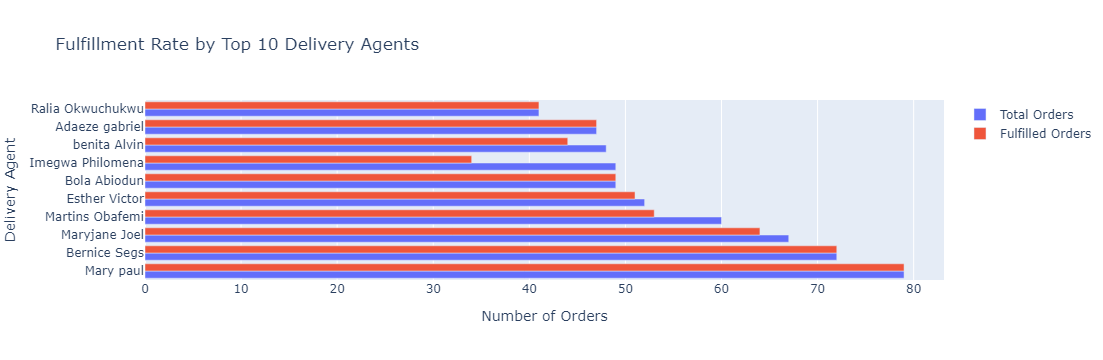

Top 10 Delivery Agents:
                  total_orders  fulfillment_rate
Delivery Agent                                  
Mary paul                   79          1.000000
Bernice Segs                72          1.000000
Maryjane Joel               67          0.955224
Martins Obafemi             60          0.883333
Esther Victor               52          0.980769
Bola Abiodun                49          1.000000
Imegwa Philomena            49          0.693878
benita Alvin                48          0.916667
Adaeze gabriel              47          1.000000
Ralia Okwuchukwu            41          1.000000


In [41]:
# Create traces for total orders and fulfilled orders
trace_total_orders = go.Bar(
    y=top_10_delivery_agents.index,
    x=top_10_delivery_agents['total_orders'],
    name='Total Orders',
    orientation='h'
)

trace_fulfilled_orders = go.Bar(
    y=top_10_delivery_agents.index,
    x=top_10_delivery_agents['fulfillment_rate'] * top_10_delivery_agents['total_orders'],
    name='Fulfilled Orders',
    orientation='h'
)

# Create layout
layout = go.Layout(
    title='Fulfillment Rate by Top 10 Delivery Agents',
    xaxis=dict(title='Number of Orders'),
    yaxis=dict(title='Delivery Agent')
)

# Create figure
fig = go.Figure(data=[trace_total_orders, trace_fulfilled_orders], layout=layout)

# Show figure
fig.show()

# Display top 10 delivery agents with number of orders delivered and fulfillment rates
print("Top 10 Delivery Agents:")
print(top_10_delivery_agents)

# d) What is the correlation between time of order and delivery success?

In [42]:
# Convert date columns to datetime format
df['OrderedAt Date '] = pd.to_datetime(df['OrderedAt Date '])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

# Calculate time taken for delivery
df['Delivery Time'] = df['Delivery Date'] - df['OrderedAt Date ']

# Define delivery success as binary values (1 for success, 0 for failure)
df['Delivery Success'] = df['shippingStatus'].apply(lambda x: 1 if x == 'delivered' else 0)

# Calculate correlation between time of order and delivery success
correlation = df['OrderedAt Date '].corr(df['Delivery Success'])

print("Correlation between time of order and delivery success:", correlation)

Correlation between time of order and delivery success: 0.12312851077246076


In [43]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(df, x='OrderedAt Date ', y='Delivery Success', trendline='ols', title='Correlation between Time of Order and Delivery Success')

# Show the plot
fig.show()

# e)	What products contribute to 80% of the loss sale value and what five delivery agents are mostly responsible for that?																

In [44]:
# Filter canceled orders
canceled_orders = df[df['shippingStatus'] == 'cancelled']

# Calculate loss sale value for each canceled order
canceled_orders['Loss Sale Value'] = canceled_orders['Quantity'] * canceled_orders['Unit Price']

# Sort products based on total loss sale value
product_loss_value = canceled_orders.groupby('Product')['Loss Sale Value'].sum().sort_values(ascending=False)

# Identify products contributing to 80% of the total loss sale value
total_loss_value = product_loss_value.sum()
cumulative_loss_value = product_loss_value.cumsum()
top_products = cumulative_loss_value[cumulative_loss_value <= 0.8 * total_loss_value]

# Determine delivery agents responsible for canceled orders of these products
responsible_agents = canceled_orders[canceled_orders['Product'].isin(top_products.index)]['Delivery Agent'].value_counts().head(5)

# Display products contributing to 80% of the loss sale value
print("Products contributing to 80% of the loss sale value:")
print(top_products)

# Display five delivery agents mostly responsible for that
print("\nFive delivery agents mostly responsible for the loss sale value:")
print(responsible_agents)

Products contributing to 80% of the loss sale value:
Product
Titus Sardines                    364650.0
My Boy Eldorin Infant Formula     717450.0
Nestle Milo                      1015650.0
Peak Milk                        1268895.0
Sonia Tomato Paste               1486195.0
Hollandia Evap. Milk             1684355.0
Dano Cool Cow                    1875775.0
Golden Penny Noodles             2066325.0
Molfix Jumbo                     2243175.0
Golden Penny Semovita            2402090.0
Golden Penny Spaghetti           2546590.0
Gino Max Cube                    2650790.0
So Easy Detergent                2753290.0
Nestle Golden Morn               2853527.5
Canoe Bar Soap                   2945227.5
Name: Loss Sale Value, dtype: float64

Five delivery agents mostly responsible for the loss sale value:
Delivery Agent
Imegwa Philomena    9
pink August         6
Waajidah vincent    5
Kenny Akinola       5
Martins Obafemi     5
Name: count, dtype: int64


C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_7628\364938758.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Filter canceled orders
canceled_orders = df[df['shippingStatus'] == 'cancelled']

# Calculate loss sale value for each canceled order
canceled_orders['Loss Sale Value'] = canceled_orders['Quantity'] * canceled_orders['Unit Price']

# Sort products based on total loss sale value
product_loss_value = canceled_orders.groupby('Product')['Loss Sale Value'].sum().sort_values(ascending=False)

# Calculate cumulative sum of loss sale value
cumulative_loss_value = product_loss_value.cumsum()

# Identify products contributing to 80% of the total loss sale value
total_loss_value = product_loss_value.sum()
top_products = cumulative_loss_value[cumulative_loss_value <= 0.8 * total_loss_value]

# Determine delivery agents responsible for canceled orders of these products
responsible_agents = canceled_orders[canceled_orders['Product'].isin(top_products.index)]['Delivery Agent'].value_counts().head(5)

# Display products contributing to 80% of the loss sale value
print("Products contributing to 80% of the loss sale value:")
print(top_products)

# Display five delivery agents mostly responsible for that
print("\nFive delivery agents mostly responsible for the loss sale value:")
print(responsible_agents)


Products contributing to 80% of the loss sale value:
Product
Titus Sardines                    364650.0
My Boy Eldorin Infant Formula     717450.0
Nestle Milo                      1015650.0
Peak Milk                        1268895.0
Sonia Tomato Paste               1486195.0
Hollandia Evap. Milk             1684355.0
Dano Cool Cow                    1875775.0
Golden Penny Noodles             2066325.0
Molfix Jumbo                     2243175.0
Golden Penny Semovita            2402090.0
Golden Penny Spaghetti           2546590.0
Gino Max Cube                    2650790.0
So Easy Detergent                2753290.0
Nestle Golden Morn               2853527.5
Canoe Bar Soap                   2945227.5
Name: Loss Sale Value, dtype: float64

Five delivery agents mostly responsible for the loss sale value:
Delivery Agent
Imegwa Philomena    9
pink August         6
Waajidah vincent    5
Kenny Akinola       5
Martins Obafemi     5
Name: count, dtype: int64


C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_7628\84331493.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



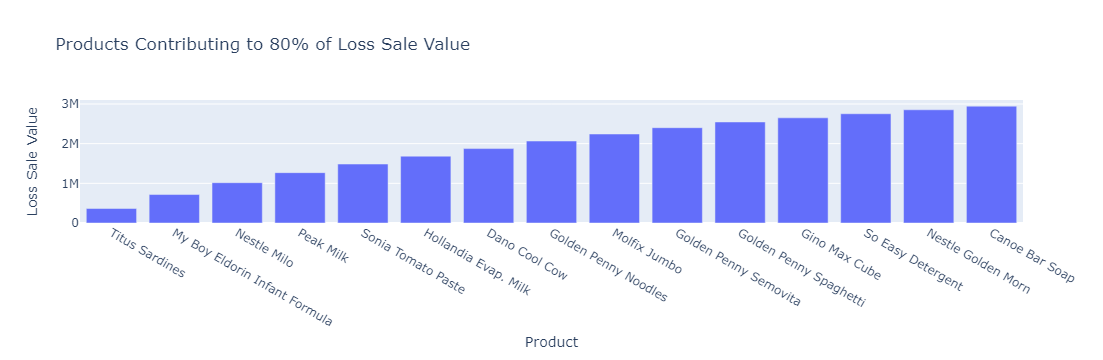

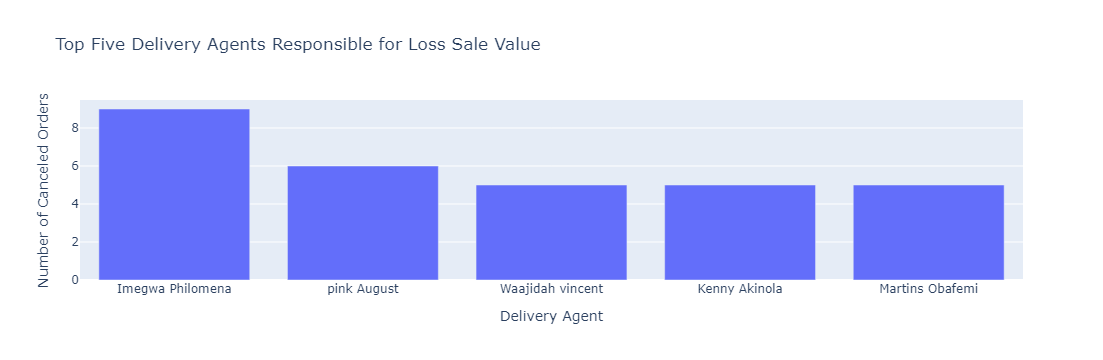

In [46]:
# Create a bar plot for products contributing to 80% of the loss sale value
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=top_products.index, y=top_products.values))
fig1.update_layout(title='Products Contributing to 80% of Loss Sale Value',
                   xaxis_title='Product',
                   yaxis_title='Loss Sale Value')
fig1.show()

# Create a bar plot for the five delivery agents mostly responsible for the loss sale value
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=responsible_agents.index, y=responsible_agents.values))
fig2.update_layout(title='Top Five Delivery Agents Responsible for Loss Sale Value',
                   xaxis_title='Delivery Agent',
                   yaxis_title='Number of Canceled Orders')
fig2.show()


## Insights

# i) What insight can you identify between the delivery timelines of the worst and the least performing Delivery Agent.																

In [47]:
# Identify missing values in the 'Delivery Date' column
missing_delivery_date = df['Delivery Date'].isnull()

# Handle missing values by removing rows with missing 'Delivery Date'
df_cleaned = df[~missing_delivery_date]

# Calculate turnaround time for non-missing values
df_cleaned['Turnaround Time'] = df_cleaned['Delivery Date'] - df_cleaned['OrderedAt Date ']

# Group data by Delivery Agent and calculate average turnaround time
turnaround_time_by_agent = df_cleaned.groupby('Delivery Agent')['Turnaround Time'].mean()

# Find the worst performing delivery agent
worst_agent_name = turnaround_time_by_agent.idxmax()

# Find the least performing delivery agent
least_agent_name = turnaround_time_by_agent.idxmin()

# Calculate average turnaround time for the worst performing delivery agent
worst_agent_avg_turnaround = turnaround_time_by_agent[worst_agent_name]

# Calculate average turnaround time for the least performing delivery agent
least_agent_avg_turnaround = turnaround_time_by_agent[least_agent_name]

# Print the insights
print("Insight on Delivery Timelines:")
print(f"Average Turnaround Time for the Worst Performing Delivery Agent ({worst_agent_name}): {worst_agent_avg_turnaround} days")
print(f"Average Turnaround Time for the Least Performing Delivery Agent ({least_agent_name}): {least_agent_avg_turnaround} days")


Insight on Delivery Timelines:
Average Turnaround Time for the Worst Performing Delivery Agent (Gem ABRAHAM): 9 days 17:33:41.500000 days
Average Turnaround Time for the Least Performing Delivery Agent (prudent denny): 0 days 16:25:13.076923076 days


C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_7628\3775432540.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
# Create a bar plot for average turnaround time by delivery agent
fig = go.Figure()
fig.add_trace(go.Bar(x=turnaround_time_by_agent.index, y=turnaround_time_by_agent.values))
fig.update_layout(title='Average Turnaround Time by Delivery Agent',
                  xaxis_title='Delivery Agent',
                  yaxis_title='Average Turnaround Time (days)')
fig.show()

# ii) Rank Delivery Agents by their average time to fulfilment highlighting the top 10 agents with the shortest turnaround times																

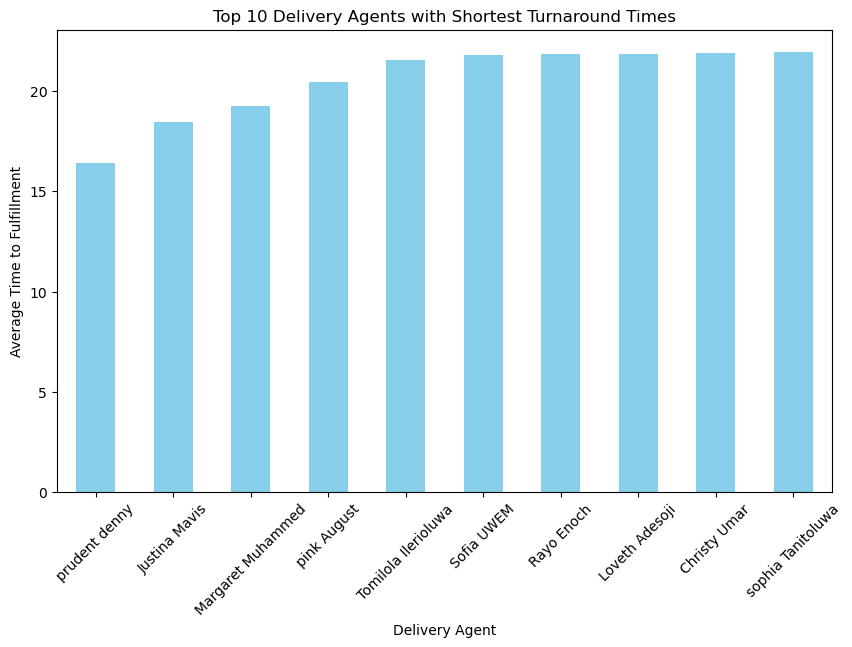

Top 10 Delivery Agents with Shortest Turnaround Times:
Delivery Agent
prudent denny          16.420299
Justina Mavis          18.455000
Margaret Muhammed      19.274861
pink August            20.466412
Tomilola Ilerioluwa    21.550556
Sofia UWEM             21.826296
Rayo Enoch             21.862794
Loveth Adesoji         21.883889
Christy Umar           21.907607
sophia Tanitoluwa      21.973171
Name: Fulfilment Time, dtype: float64


In [49]:
# Group data by Delivery Agent and calculate average time to fulfillment
avg_time_to_fulfillment = df.groupby('Delivery Agent')['Fulfilment Time'].mean()

# Sort Delivery Agents based on average time to fulfillment
sorted_agents = avg_time_to_fulfillment.sort_values()

# Select top 10 agents with shortest turnaround times
top_10_agents = sorted_agents.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_agents.plot(kind='bar', color='skyblue')
plt.title('Top 10 Delivery Agents with Shortest Turnaround Times')
plt.xlabel('Delivery Agent')
plt.ylabel('Average Time to Fulfillment')
plt.xticks(rotation=45)
plt.show()

# Display the ranked list of top 10 delivery agents
print("Top 10 Delivery Agents with Shortest Turnaround Times:")
print(top_10_agents)

In [50]:
# Convert the pandas Series to a DataFrame
top_10_agents_df = top_10_agents.reset_index()

# Plot the top 10 delivery agents with shortest turnaround times using Plotly
fig = px.bar(top_10_agents_df, x='Delivery Agent', y='Fulfilment Time',
             title='Top 10 Delivery Agents with Shortest Turnaround Times',
             labels={'Delivery Agent': 'Delivery Agent', 'Fulfilment Time': 'Average Time to Fulfillment'})
fig.show()

# iii)	Analyse the relationship between value of products in the delivery agent's van and successful delivery (Use Value Bands)																


C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_7628\4203892140.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



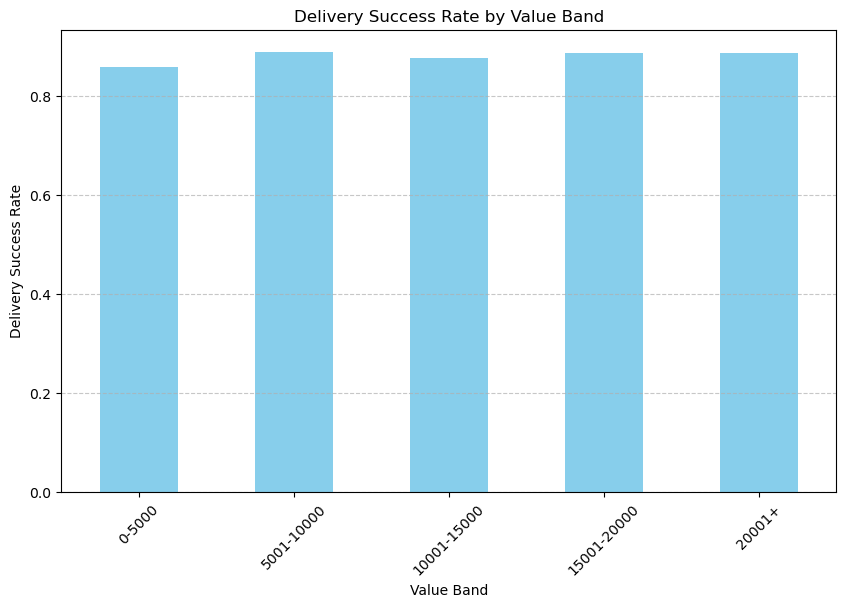

Delivery Success Rate by Value Band:
Value Band
0-5000         0.856948
5001-10000     0.888889
10001-15000    0.875421
15001-20000    0.885965
20001+         0.885514
Name: Delivery Success, dtype: float64


In [51]:
# Define the value bands
value_bins = [0, 5000, 10000, 15000, 20000, np.inf]
value_labels = ['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001+']

# Assign each row to a value band based on the total sales value
df['Value Band'] = pd.cut(df['Total Sales Value'], bins=value_bins, labels=value_labels)

# Calculate the delivery success rate for each value band
success_rate_by_value_band = df.groupby('Value Band')['Delivery Success'].mean()

# Visualize the relationship between value bands and delivery success rates
plt.figure(figsize=(10, 6))
success_rate_by_value_band.plot(kind='bar', color='skyblue')
plt.title('Delivery Success Rate by Value Band')
plt.xlabel('Value Band')
plt.ylabel('Delivery Success Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the delivery success rate for each value band
print("Delivery Success Rate by Value Band:")
print(success_rate_by_value_band)

In [52]:
# Reset the index of the DataFrame
success_rate_by_value_band_df = success_rate_by_value_band.reset_index()

# Plot the delivery success rate by value band using Plotly
fig = px.bar(success_rate_by_value_band_df, x='Value Band', y='Delivery Success',
             title='Delivery Success Rate by Value Band',
             labels={'Value Band': 'Value Band', 'Delivery Success': 'Delivery Success Rate'})
fig.update_xaxes(type='category')  # Ensure the x-axis is treated as categorical
fig.show()

# v)	Provide insights as to the relationship between late or no fulfilment and how they affect customer buying frequency																


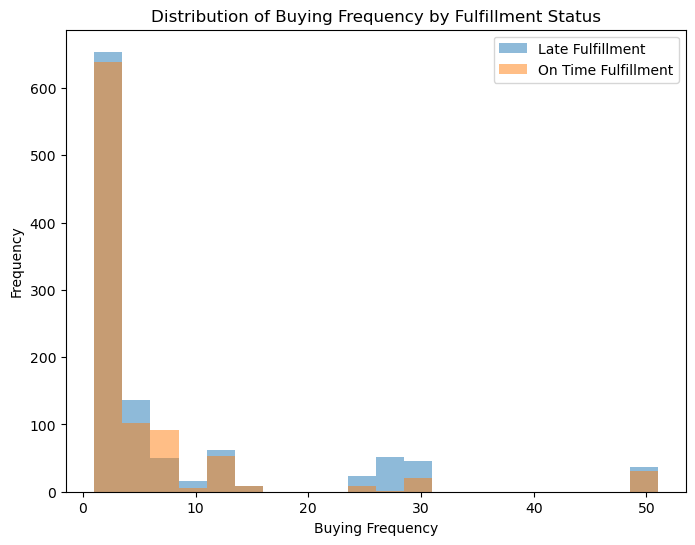

Statistical Results:
T-statistic: 4.186795955374443
P-value: 2.9492454939980566e-05


In [53]:
# Convert date columns to datetime format
df['OrderedAt Date '] = pd.to_datetime(df['OrderedAt Date '])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

# Calculate delivery delay
df['Delivery Delay'] = (df['Delivery Date'] - df['OrderedAt Date ']).dt.days

# Identify late or no fulfillment
df['Late or No Fulfillment'] = np.where(df['Delivery Delay'] > 0, 'Late', 'On Time')

# Calculate buying frequency for each customer
customer_frequency = df.groupby('Customer Name')['Order No.'].nunique()

# Merge buying frequency with original dataframe
df = df.merge(customer_frequency, on='Customer Name', suffixes=('', '_Freq'))

# Analyze impact on buying frequency
late_fulfillment_freq = df[df['Late or No Fulfillment'] == 'Late']['Order No._Freq']
on_time_fulfillment_freq = df[df['Late or No Fulfillment'] == 'On Time']['Order No._Freq']

# Statistical analysis
t_stat, p_value = stats.ttest_ind(late_fulfillment_freq, on_time_fulfillment_freq)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.hist(late_fulfillment_freq, bins=20, alpha=0.5, label='Late Fulfillment')
plt.hist(on_time_fulfillment_freq, bins=20, alpha=0.5, label='On Time Fulfillment')
plt.xlabel('Buying Frequency')
plt.ylabel('Frequency')
plt.title('Distribution of Buying Frequency by Fulfillment Status')
plt.legend()
plt.show()

# Print statistical results
print("Statistical Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

In [ ]:
# Create histograms for late fulfillment and on-time fulfillment
fig = go.Figure()
fig.add_trace(go.Histogram(x=late_fulfillment_freq, name='Late Fulfillment', opacity=0.5))
fig.add_trace(go.Histogram(x=on_time_fulfillment_freq, name='On Time Fulfillment', opacity=0.5))

# Update layout
fig.update_layout(
    title='Distribution of Buying Frequency by Fulfillment Status',
    xaxis_title='Buying Frequency',
    yaxis_title='Frequency',
    barmode='overlay'
)

# Show the plot
fig.show()